# 1st Kr NEXT-100 full/detsim comparison 

## sim / det sim

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Configuration

In [3]:
import re
import glob
from collections import namedtuple

import sys
pypaths= ("/Users/hernando/work/investigacion/NEXT/software/nextana",
         "/Users/hernando/work/investigacion/NEXT/software/hipy",
         "/Users/hernando/work/investigacion/NEXT/software/IC")
for ipypath in pypaths:
       sys.path.insert(0,ipypath)

In [4]:
import numpy             as np
import pandas            as pd
import tables            as tb
from   scipy             import stats
from   scipy             import optimize

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['image.cmap'] = 'rainbow'

In [5]:
from invisible_cities.io.dst_io import load_dst, load_dsts

In [254]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.profile      as prof

#import nana.kr.krana    as krana
import nana.kr.krmap    as krtool

#import nana.bclouds.bclouds      as bc
#import hipy.hfit         as hfit
from invisible_cities.io.dst_io import load_dst, load_dsts
#import invisible_cities.io.dst_io as dio

In [7]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Mon Mar 17 18:15:21 2025


## Import Data

In [8]:
path_data = '/Users/hernando/work/investigacion/NEXT/data/NEXT100/MC/kr'
#path_run = '/250107_4bar/data/kdst'
path_run_detsim  = '/250203_4bar'
path_run_fullsim1 = '/250221_4bar_fullsim'
path_run_fullsim2 = '/250311_4bar_fullsim'

from os import listdir

#filenames = listdir(path_data + path_run_fullsim)
#filenames.sort()
#print('number of files :', len(filenames))
#print('fist files: ', filenames[0], filenames[-1])
#filenames = [path_data + path_run_fullsim + '/' + ifile for ifile in filenames]

In [9]:
def load_data(path_run, path_data = path_data):
    print('path ', path_data + path_run)
    filenames = listdir(path_data + path_run)
    filenames.sort()
    print('number of files :', len(filenames))
    print('first/last files: ', filenames[0], filenames[-1])
    filenames = [path_data + path_run + '/' + ifile for ifile in filenames]
    kfsim = load_dsts(filenames, "DST", "Events")
    #kfsim['R'] =np.sqrt(kfsim.X**2 + kfsim.Y**2)
    #kdsim = load_dst(path_data + path_run_detsim+ '/merged.kdst', "DST", "Events")
    return kfsim

### load MC full sim

In [10]:
kfsim1 = load_data(path_run_fullsim1)
kfsim2 = load_data(path_run_fullsim2)
kfsim  = pd.concat((kfsim1, kfsim2))
#kfsim['R'] =np.sqrt(kfsim.X**2 + kfsim.Y**2)
#kdsim = load_dst(path_data + path_run_detsim+ '/merged.kdst', "DST", "Events")
#kfsim = load_dst(path_data + path_run_detsim+ '/merged.kdst', "DST", "Events")

path  /Users/hernando/work/investigacion/NEXT/data/NEXT100/MC/kr/250221_4bar_fullsim
number of files : 874
first/last files:  NEXT100_Kr83m_Full_dorothea_0.h5 NEXT100_Kr83m_Full_dorothea_998.h5
path  /Users/hernando/work/investigacion/NEXT/data/NEXT100/MC/kr/250311_4bar_fullsim
number of files : 827
first/last files:  NEXT100_Kr83m_Full_dorothea_0.h5 NEXT100_Kr83m_Full_dorothea_3577.h5


### load MC det sim

In [13]:
run_detsim = '/250203_4bar/merged.kdst'


ifile_detsim = path_data + run_detsim
print('detsim file: ', ifile_detsim)
kdsim = load_dst(ifile_detsim, "DST", "Events")

detsim file:  /Users/hernando/work/investigacion/NEXT/data/NEXT100/MC/kr/250203_4bar/merged.kdst


### Fidutial selection

In [27]:
def kdst_rename(kdst):
    print('size x ', np.min(kdst.X[kdst.X > -1000.]), np.max(kdst.X))
    print('size y ', np.min(kdst.Y[kdst.Y > -1000.]), np.max(kdst.Y))
    kdst_ = kdst.rename(columns = {'S2e' : 'energy', 'X' : 'x', 'Y' : 'y', 'Z' : 'z', 
                              'DT' : 'dtime', 'R' : 'r', 'nS1': 'nS1', 'nS2': 'nS2'})
    print(list(kdst_.columns))
    return kdst_

In [144]:
mfsim = kdst_rename(kfsim)
mdsim = kdst_rename(kdsim)[:250000]

size x  -482.625 490.02500000000003
size y  -479.92500000000007 492.7250000000001
['event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w', 'S1h', 'S1e', 'S1t', 'S2w', 'S2h', 'energy', 'S2q', 'S2t', 'qmax', 'Nsipm', 'dtime', 'z', 'Zrms', 'x', 'y', 'r', 'Phi', 'Xrms', 'Yrms']
size x  -482.625 490.02500000000003
size y  -479.9250000000001 492.7250000000001
['event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w', 'S1h', 'S1e', 'S1t', 'S2w', 'S2h', 'energy', 'S2q', 'S2t', 'qmax', 'Nsipm', 'dtime', 'z', 'Zrms', 'x', 'y', 'r', 'Phi', 'Xrms', 'Yrms']


In [145]:
#mkdst = kdst
#pltext.hist(mdsim.time, 100);
print('len full sim ', len(mfsim))
print('len det  sim ', len(mdsim))

len full sim  244121
len det  sim  250000


## Inspect DF

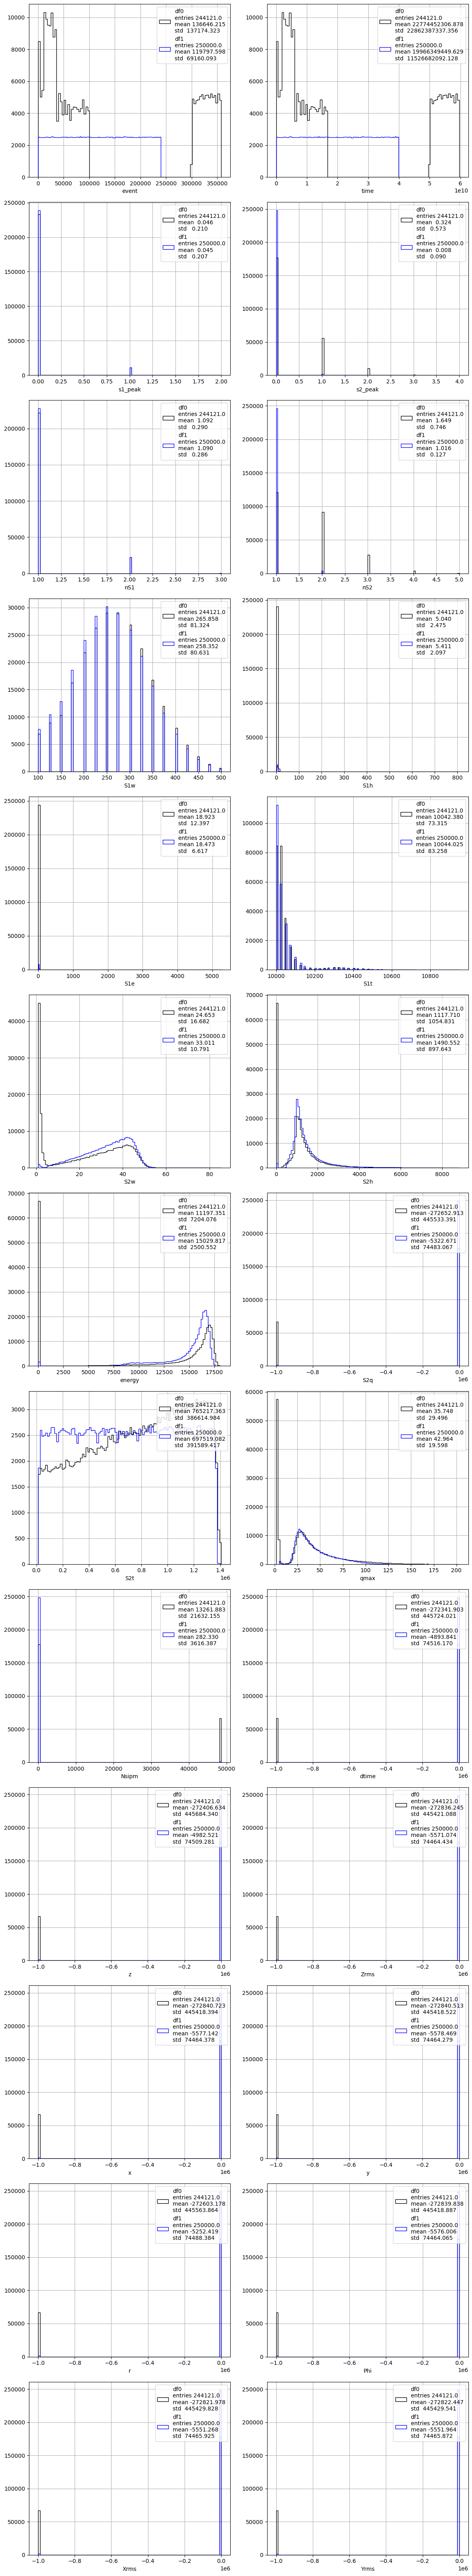

In [147]:
pltext.df_inspect((mfsim, mdsim));

## Selection

In [148]:
def selections(df, dranges):
    sels = {}
    for key in dranges.keys():
        vname, vrange = dranges[key][0], dranges[key][1:]
        sels[key] = ut.in_range(df[vname], vrange)
    return sels

In [149]:
dranges = {'r' : ('r', 0, 550.), 'dtime' : ('dtime', 0, 1450.), 'energy' : ('energy', 1e3, 21e4),
           'nS1': ('nS1', 1, 1.5), 'nS2': ('nS2', 1, 1.5), 'rcentral' : ('r', 0, 300)}

sels = {}
sels['fsim'] = selections(mfsim, dranges)
sels['dsim'] = selections(mdsim, dranges)

names = 'fsim', 'dsim'
for name in names:
    #sel = ((sels[name]['r']) & (sels[name]['dtime']) & (sels[name]['energy']) & (sels[name]['nS1']) & (sels[name]['nS2']))
    sel1 = (sels[name]['r']) & (sels[name]['dtime']) & (sels[name]['energy'])
    sel0 = ((sels[name]['nS1']) & (sels[name]['nS2']))
    sel2  = (sel1) & (sels[name]['rcentral'])
    sels[name]['fidutial'] = sel1
    sels[name]['1S11S2']   = sel0
    sels[name]['central']  = sel2
    def _prt(name, sname, sel):
        print('len ', name, sname, sum(sel), len(sel), sum(sel)/(1.*len(sel)))
    _prt(name, 'fidutial', sel1)
    _prt(name, 'central', sel2)
    _prt(name, '1S11S2', sel0)


len  fsim fidutial 177236 244121 0.7260170161518263
len  fsim central 66910 244121 0.274085392080157
len  fsim 1S11S2 110254 244121 0.4516366883635574
len  dsim fidutial 248193 250000 0.992772
len  dsim central 93885 250000 0.37554
len  dsim 1S11S2 224006 250000 0.896024


In [150]:
kdsts = {'fsim' : mfsim, 'dsim' : mdsim}

## Compare 

In [ ]:
def hcompare(vname, sname, range = None, bins = 100):
    for name in names:
        kdst = kdsts[name] 
        sel  = sels[name][sname]
        pltext.hist(kdst[sel][vname], range= range, density = True, bins = bins, label = name)
        plt.xlabel(vname)

In [157]:
def hcompare_s2(sname = 'fidutial'):
    cd = pltext.canvas(8, 2)
    plt.rcParams['legend.loc'] = 'upper right'
    cd(1); hcompare('nS2', sname, range = (0, 6), bins = 12);
    plt.rcParams['legend.loc'] = 'upper left'
    cd(2); hcompare('dtime');
    cd(3); hcompare('energy', sname, range = (2500, 18000))
    plt.rcParams['legend.loc'] = 'upper right'
    cd(4); hcompare('S2h', sname)
    cd(5); hcompare('S2q', sname);
    cd(6); hcompare('qmax');
    plt.rcParams['legend.loc'] = 'upper left'
    cd(7); hcompare('S2w', sname, range = (0, 65))
    plt.rcParams['legend.loc'] = 'upper right'
    cd(8); hcompare('Nsipm', sname, range = (0, 30)),

def hcompare_s1(sname = 'fidutial'):
    cd = pltext.canvas(6, 2)
    cd(1); hcompare('nS1', sname, range = (0, 5));
    cd(2); hcompare('S1t', sname, );
    cd(3); hcompare('S1e', sname, range = (0, 50), bins = 51)
    cd(4); hcompare('S1w', sname, )
    plt.rcParams['legend.loc'] = 'upper right'
    cd(5); hcompare('S1h', sname, range = (0, 15), bins = 16)
    cd(6); hcompare('dtime', sname);

def hcompare_xyz(sname = 'fidutial'):
    cd = pltext.canvas(8, 2)
    cd(1); hcompare('x', sname)
    cd(2); hcompare('y', sname)
    cd(3); hcompare('Xrms', sname, range = (0, 150))
    cd(4); hcompare('Yrms', sname, range = (0, 150));
    plt.rcParams['legend.loc'] = 'upper left'
    cd(5); hcompare('r', sname);
    plt.rcParams['legend.loc'] = 'upper right'
    cd(6); hcompare('Phi', sname);
    cd(7); hcompare('z', sname);
    cd(8); hcompare('Zrms', sname, range = (0, 15));    

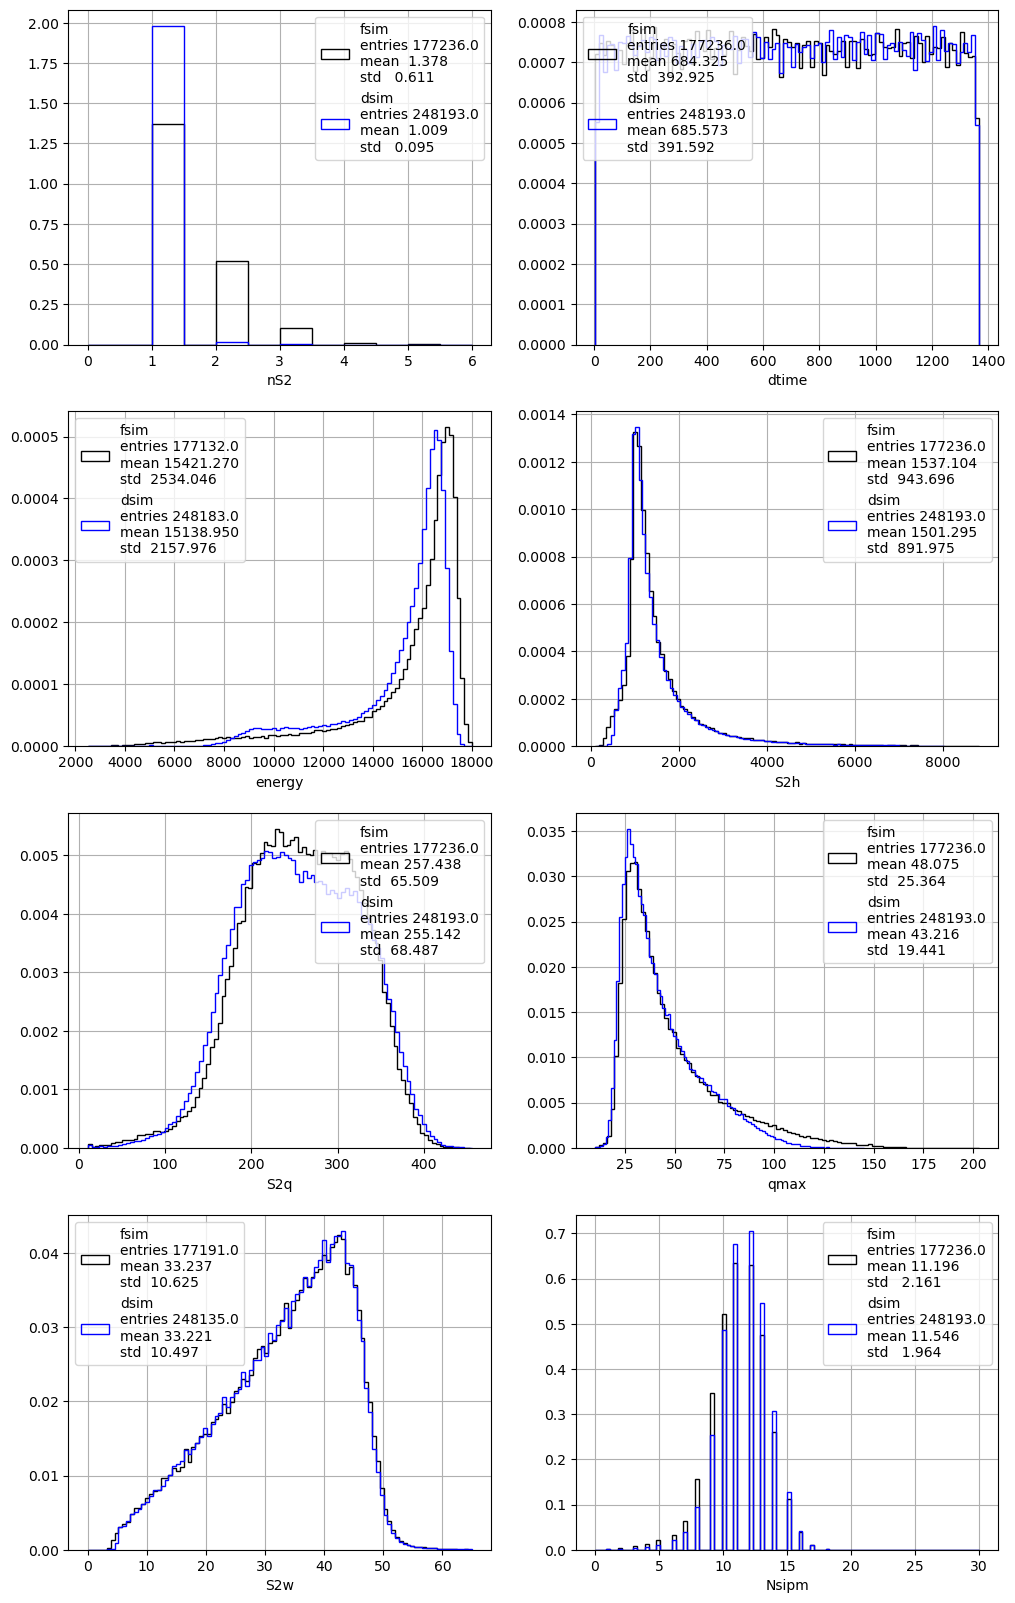

In [162]:
sname = 'fidutial'
hcompare_s2(sname)

### Comparison S2 (fidutial)

* discrepancy on the number of S2. More S2 in the fullsim (related with the NEXUS generation?)

* Slightly scale energy difference. More energy in fullsim (ralated with the LT?)

* Slightly shape of the charge distribution. Why? Different share that in detsim. Maybe not too relevant

* Great agreement in S2w (diffusion)

* Slightly more number os SiPMs in detsim. Not relevant 

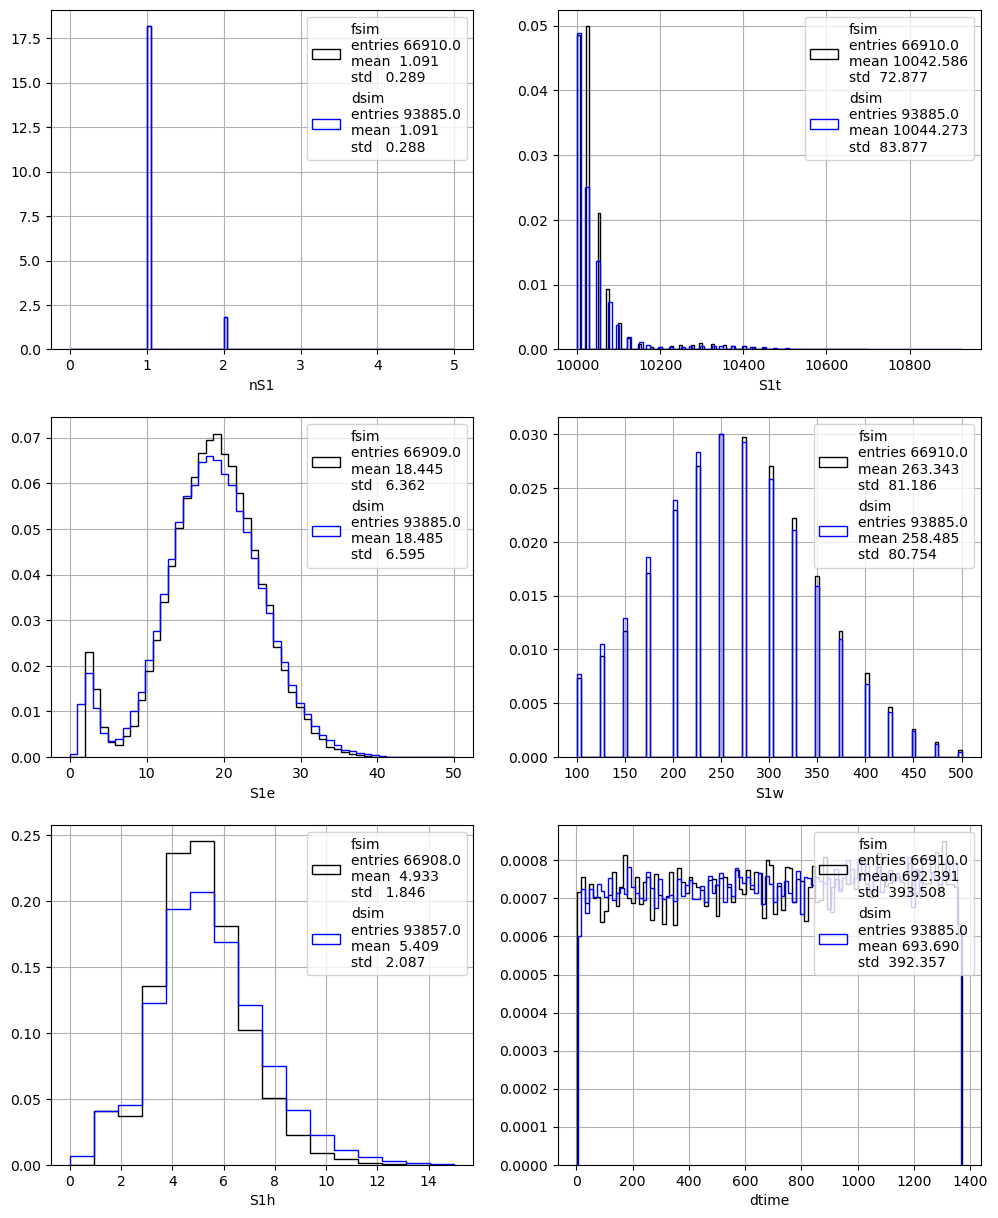

In [160]:
hcompare_s1(sname)

### Comparison S1

* Very good agreement in general

* slight more high on detsim than in fullsim, maybe not so relevant.

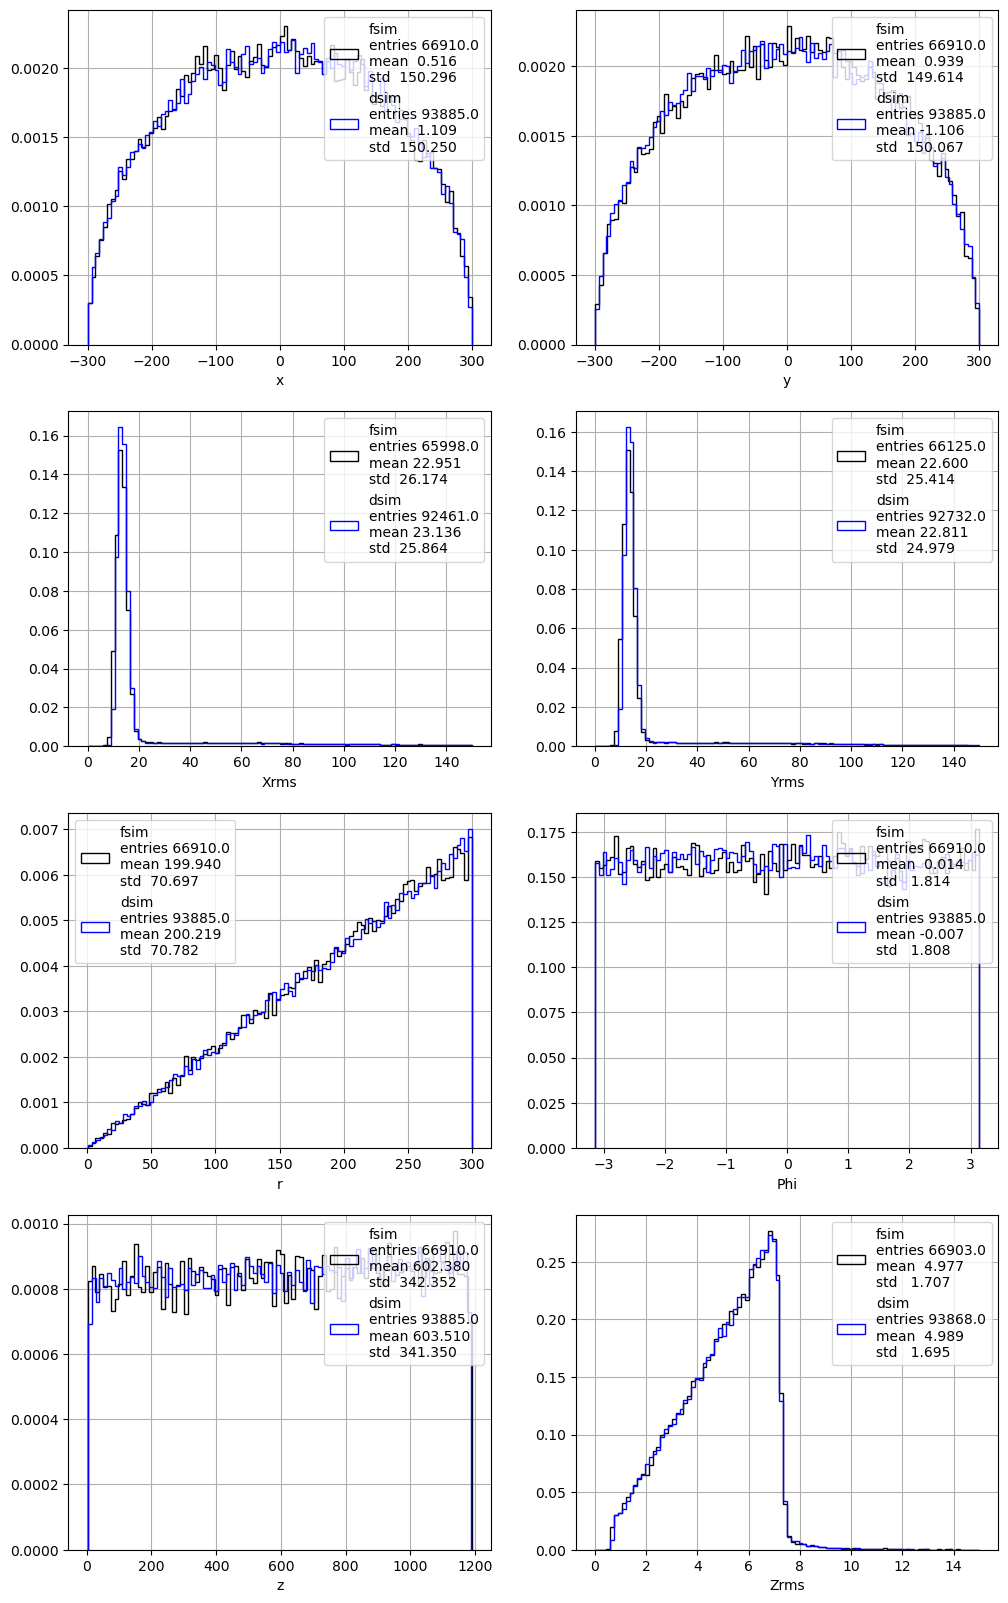

In [161]:
hcompare_xyz(sname)

### Comparison

* Excelent agreemen (even in the extrange *r* distribution end)

### Main distributions

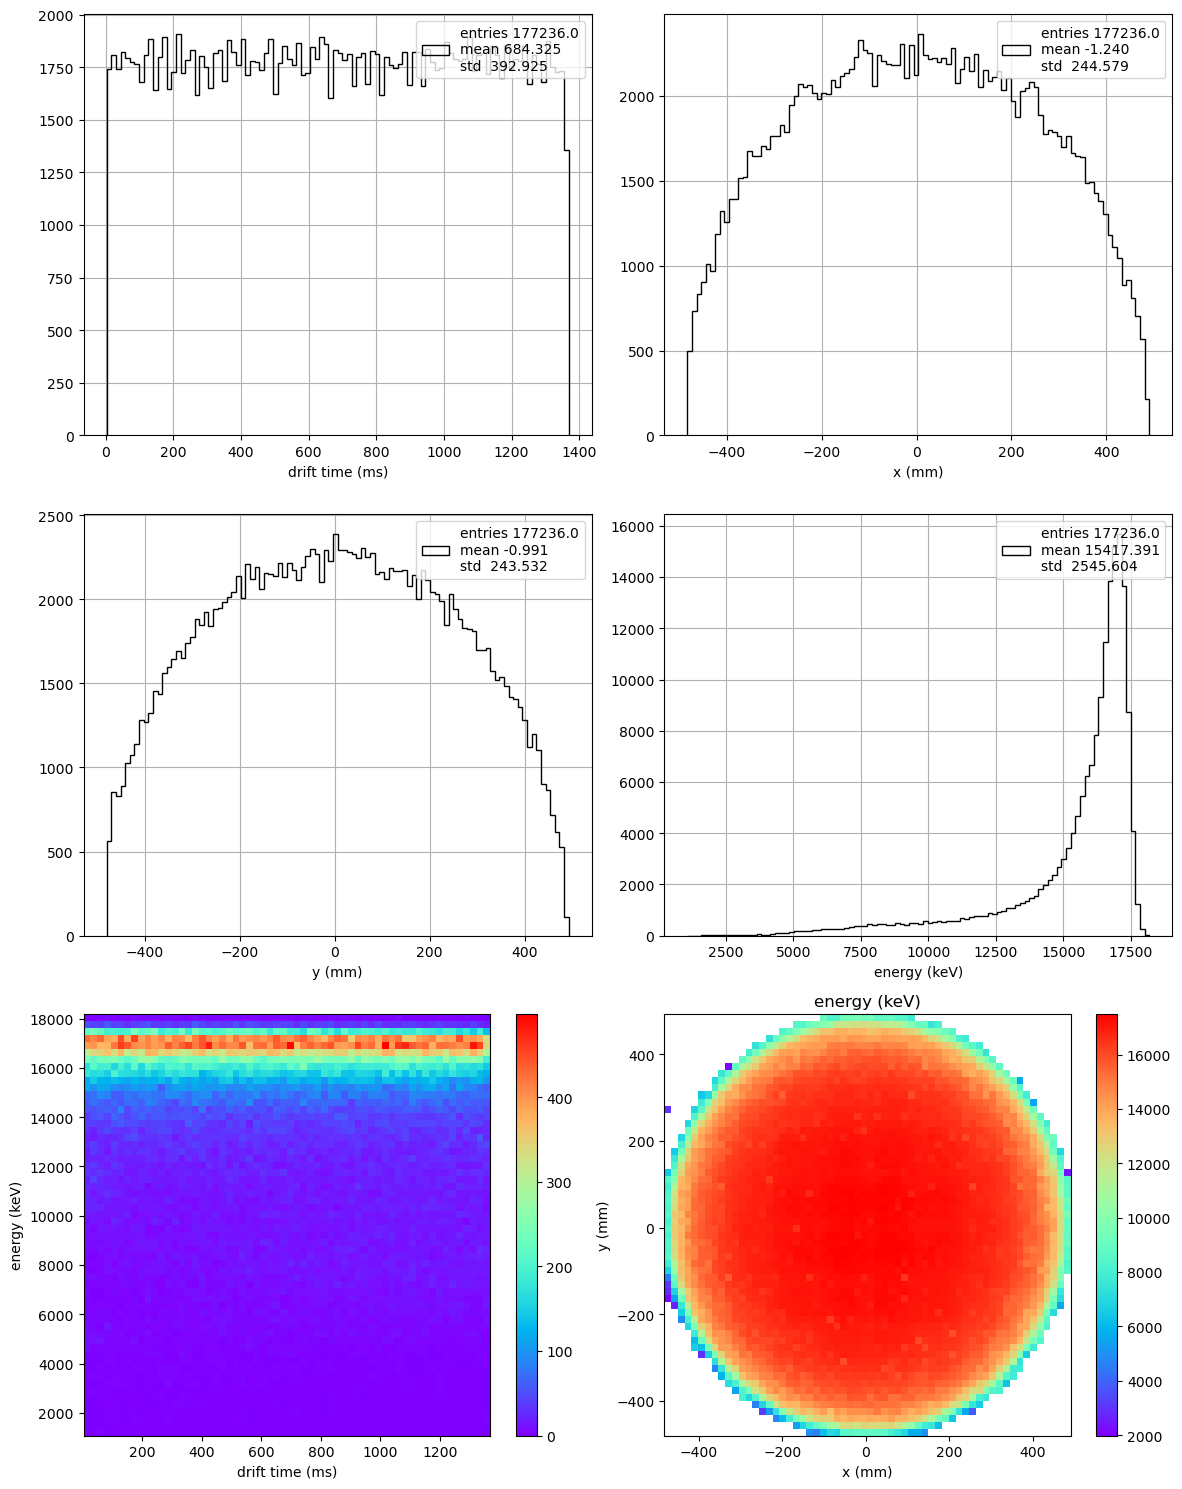

In [164]:
name, sname  = 'fsim', 'fidutial'
kdst, sel = kdsts[name], sels[name][sname]
krtool.plot_data(kdst[sel], 60)

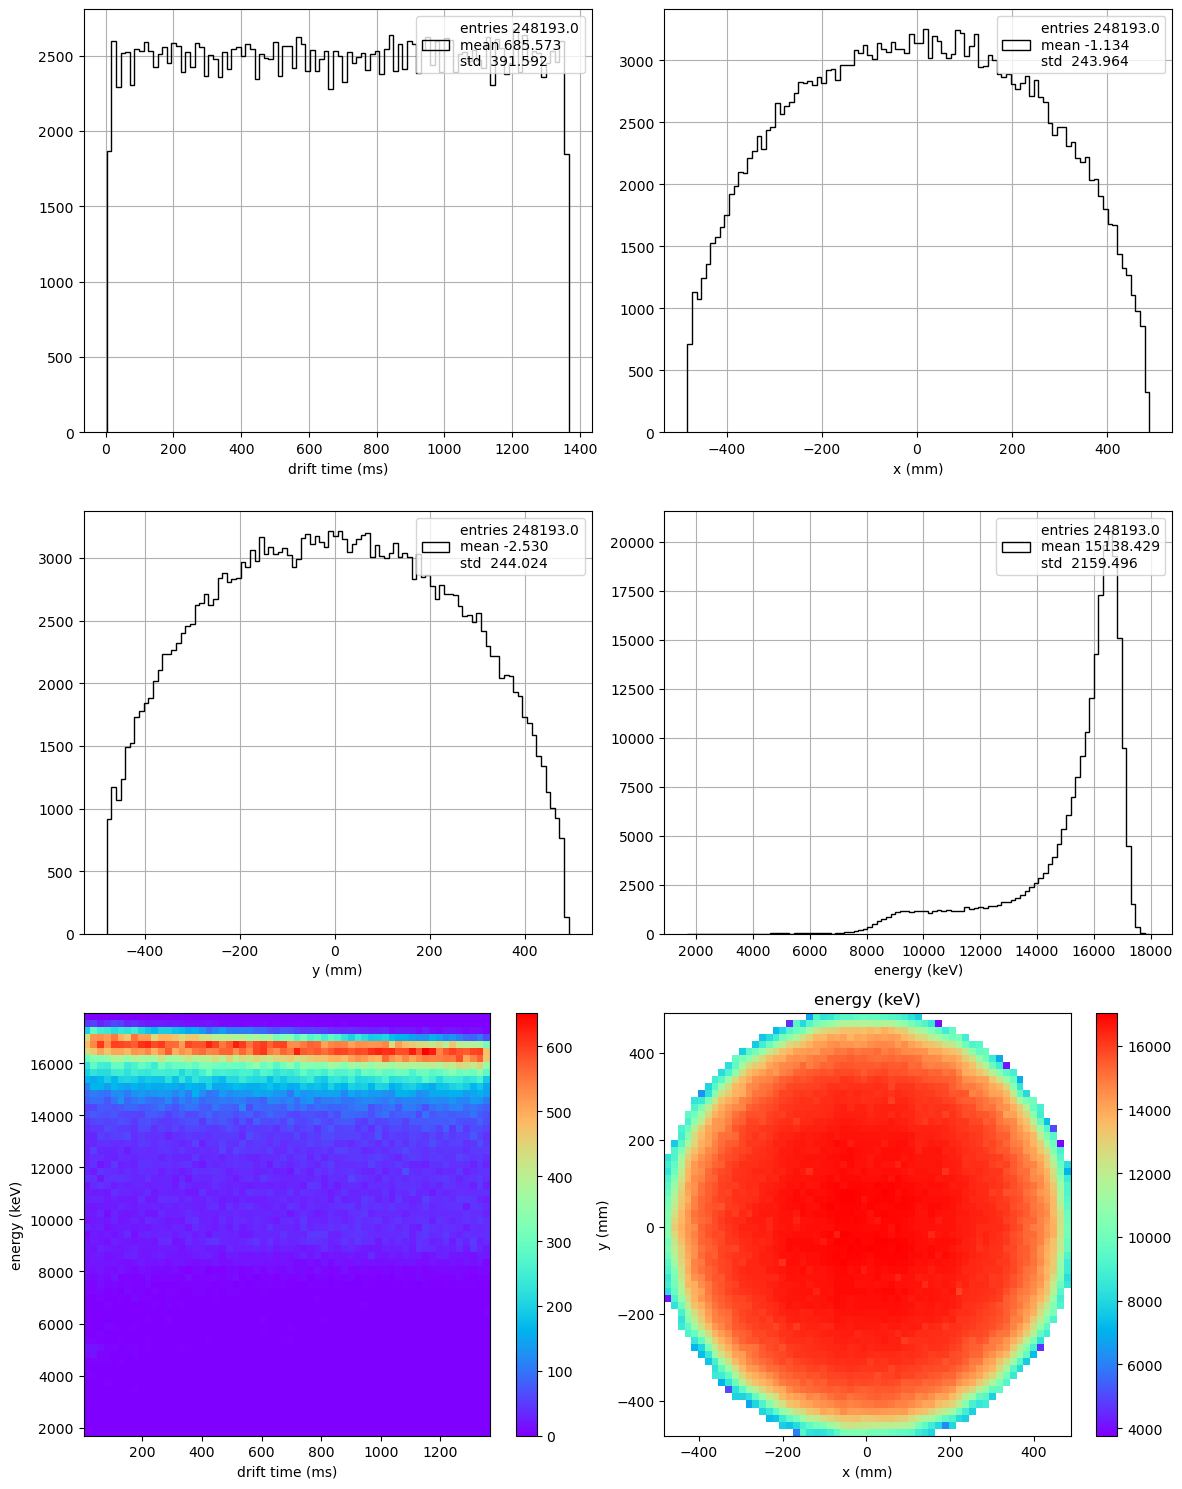

In [165]:
name, sname  = 'dsim', 'fidutial'
kdst, sel = kdsts[name], sels[name][sname]
krtool.plot_data(kdst[sel], 60)

## Kr map

In [166]:
pitch      = 15.00
xmin       = -489.825
xbins      = np.arange(xmin, -xmin + pitch, pitch)
bins       = (xbins, xbins) 
print('number of bins ', len(xbins), ', range : ', xbins[0], ', ', xbins[-1])

number of bins  67 , range :  -489.825 ,  500.175


In [ ]:
def create_krmap(kdst, bins, counts_min = 20, min_sigma = 0.92):
    coors  = kdst.x, kdst.y
    energy = kdst.energy
    dtime  = kdst.dtime
    krmap, usel = krtool.clean_krmap(coors, dtime, energy, bins = bins, min_sigma = min_sigma, dt0 = 0, counts_min = counts_min)
    return coors, energy, dtime, krmap, usel

In [169]:
def plot_krmap(krmap):
    krtool.plot_xyvar(krmap.counts , krmap.bin_edges, 'counts' , mask = krmap.counts > 0)
    krtool.plot_xyvar(krmap.success, krmap.bin_edges, 'success', mask = krmap.success)
    krtool.plot_xyvar(krmap.eref   , krmap.bin_edges, 'eref'   , mask = krmap.success)
    krtool.plot_xyvar(krmap.dedt   , krmap.bin_edges, 'dedt'   , mask = krmap.success)
    krtool.plot_xyvar(krmap.dtref  , krmap.bin_edges, 'dtref'  , mask = krmap.success)
    krtool.plot_xyvar(krmap.ueref  , krmap.bin_edges, 'ueref'  , mask = krmap.success)
    krtool.plot_xyvar(krmap.udedt  , krmap.bin_edges, 'udedt'  , mask = krmap.success)
    krtool.plot_xyvar(krmap.cov    , krmap.bin_edges, 'cov'    , mask = krmap.success)
    krtool.plot_xyvar(krmap.chi2   , krmap.bin_edges, 'chi2'   , mask = krmap.success)
    krtool.plot_xyvar(krmap.sigma  , krmap.bin_edges, 'sigma'  , mask = krmap.success)
    krtool.plot_xyvar(krmap.pvalue , krmap.bin_edges, 'pvalue' , mask = krmap.success)

    lt, ult = krtool.krmap_lifetime(krmap)
    krtool.plot_xyvar(lt   , krmap.bin_edges, 'lt'  , mask = krmap.success);
    krtool.plot_xyvar(ult  , krmap.bin_edges, 'ult' , mask = krmap.success)

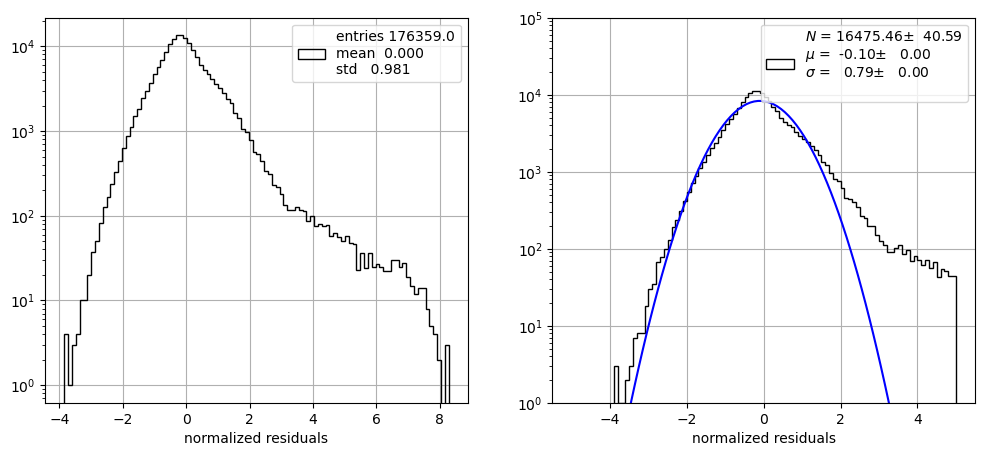

sigma 0.79 done  False  eff 98.39


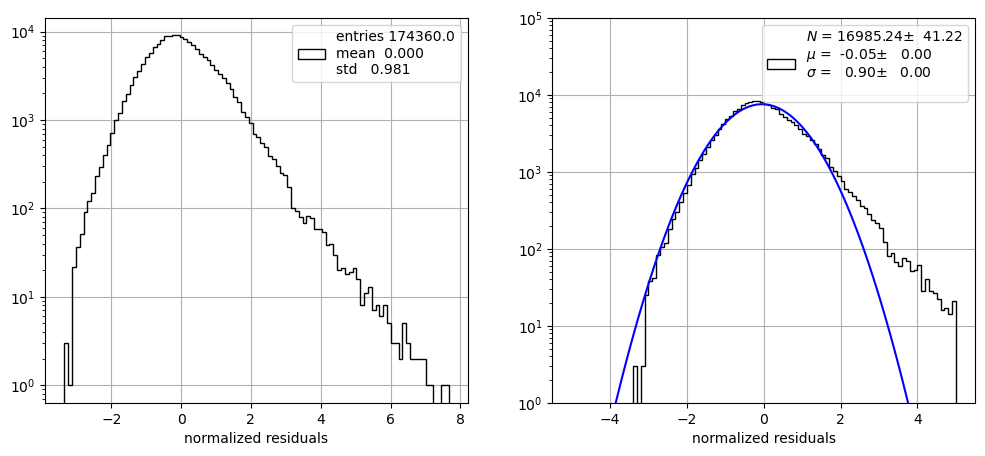

sigma 0.90 done  False  eff 99.62


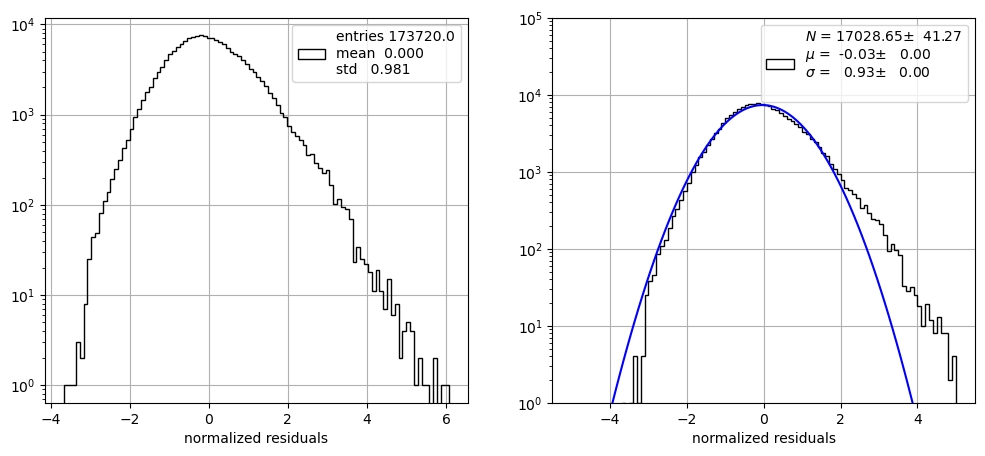

sigma 0.93 done  True  eff 100.00


In [199]:
min_sigma   = 0.9
name, sname = 'fsim', 'fidutial'
kdst, sel = kdsts[name], sels[name][sname]
fcoors, fene, fdtime, fkrmap, fusel = create_krmap(kdst[sel], bins, min_sigma = min_sigma)

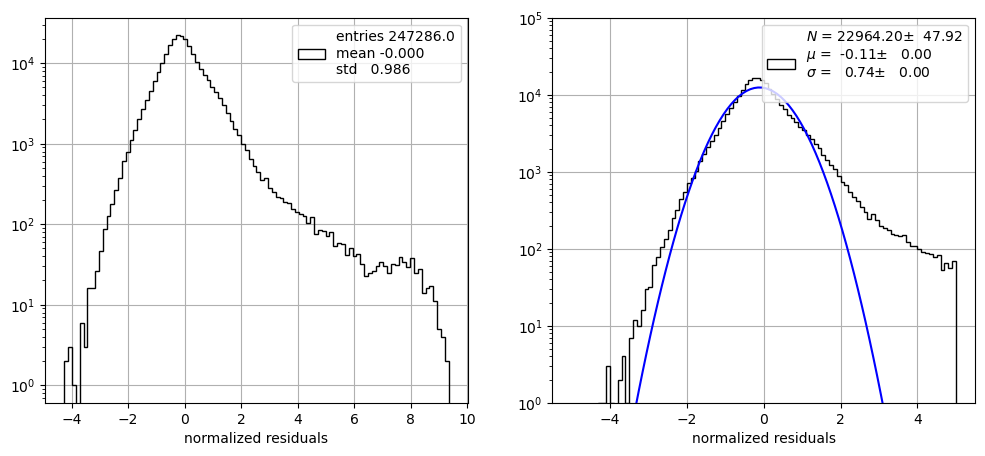

sigma 0.74 done  False  eff 98.22


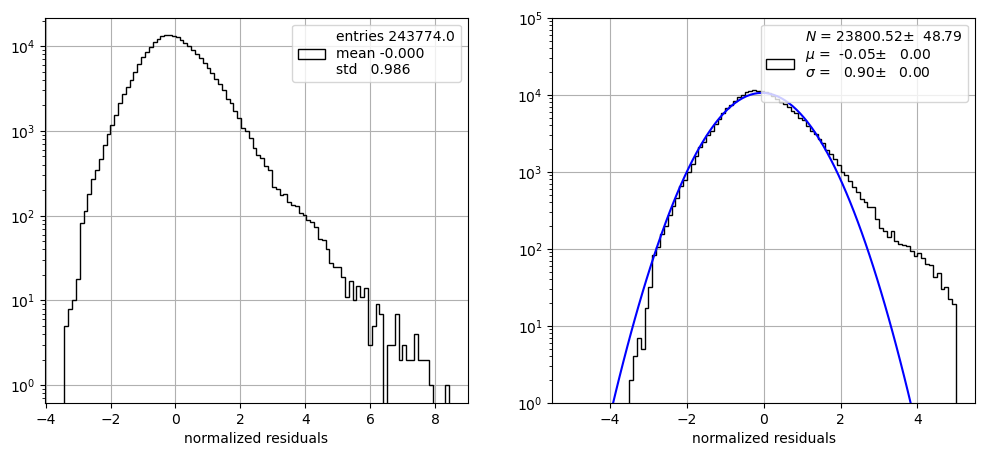

sigma 0.90 done  False  eff 99.56


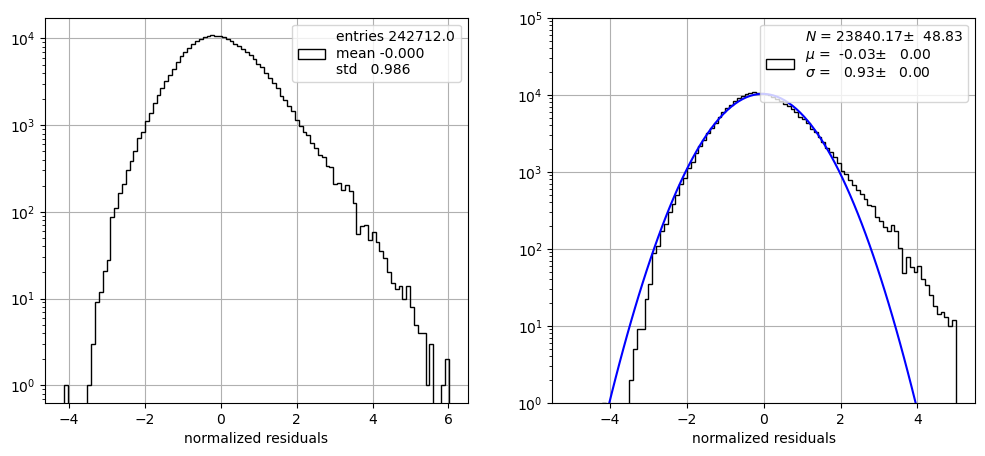

sigma 0.93 done  True  eff 100.00


In [200]:
name, sname = 'dsim', 'fidutial'
kdst, sel = kdsts[name], sels[name][sname]
dcoors, dene, ddtime, dkrmap, dusel = create_krmap(kdst[sel], bins, min_sigma = min_sigma)

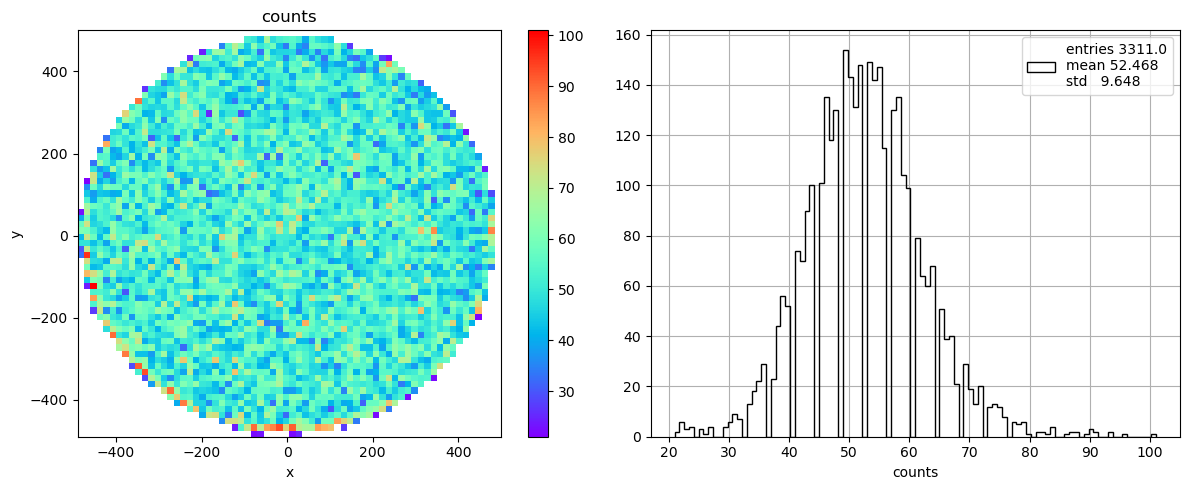

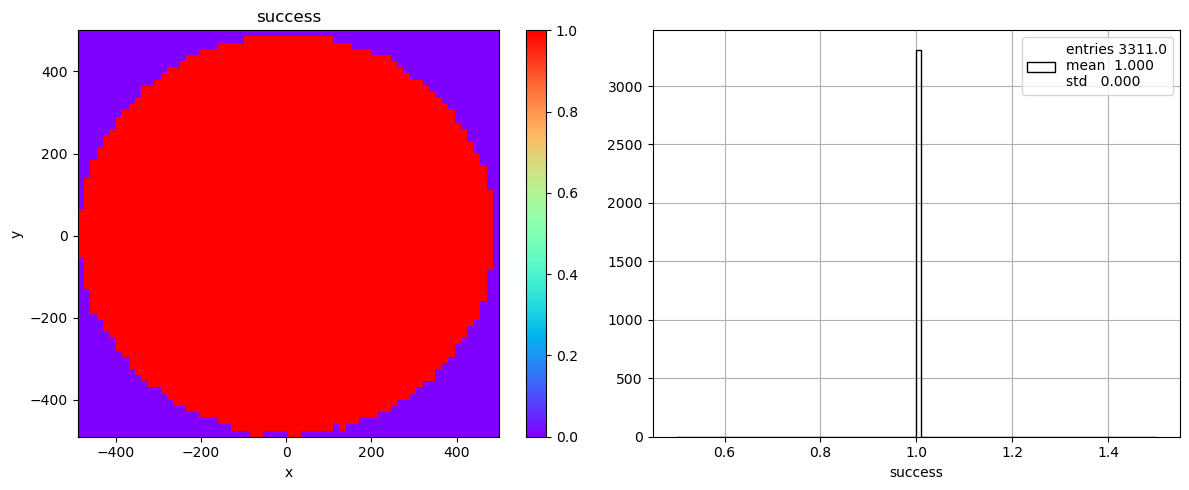

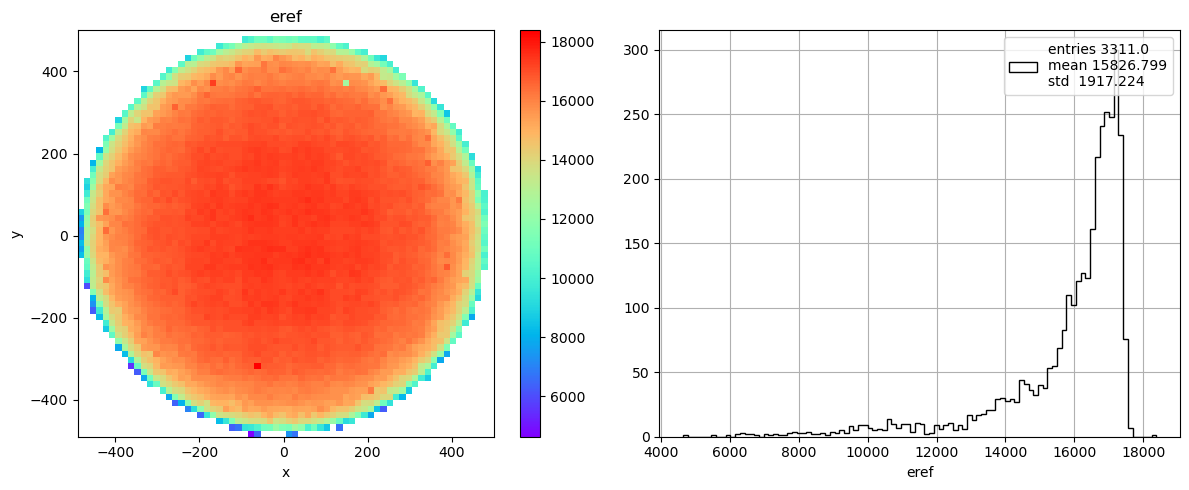

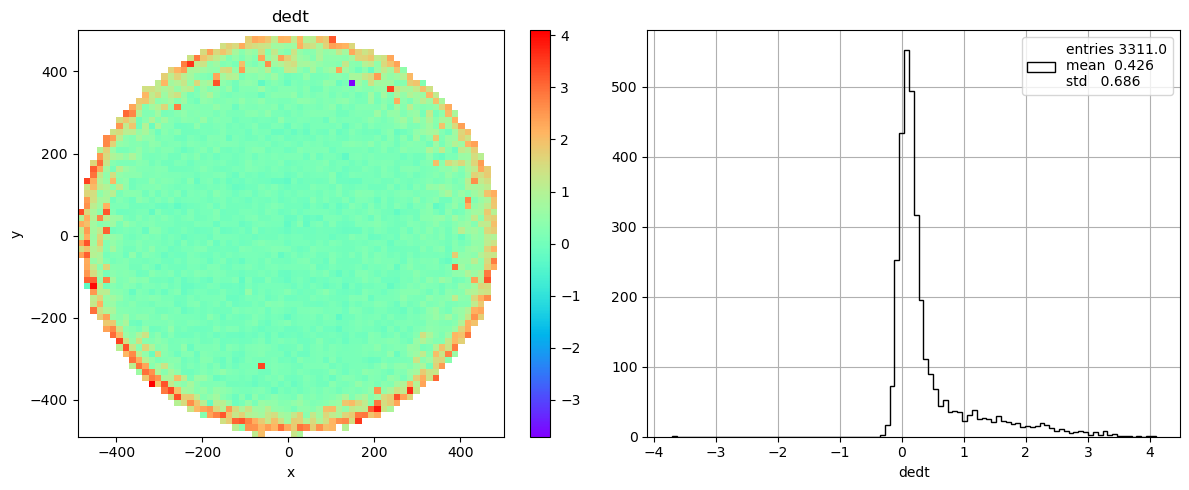

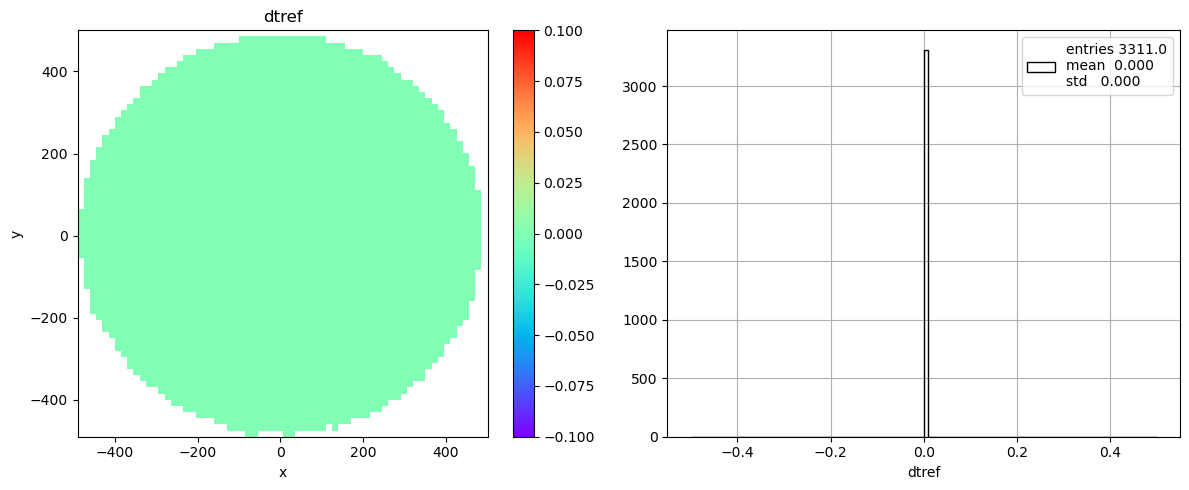

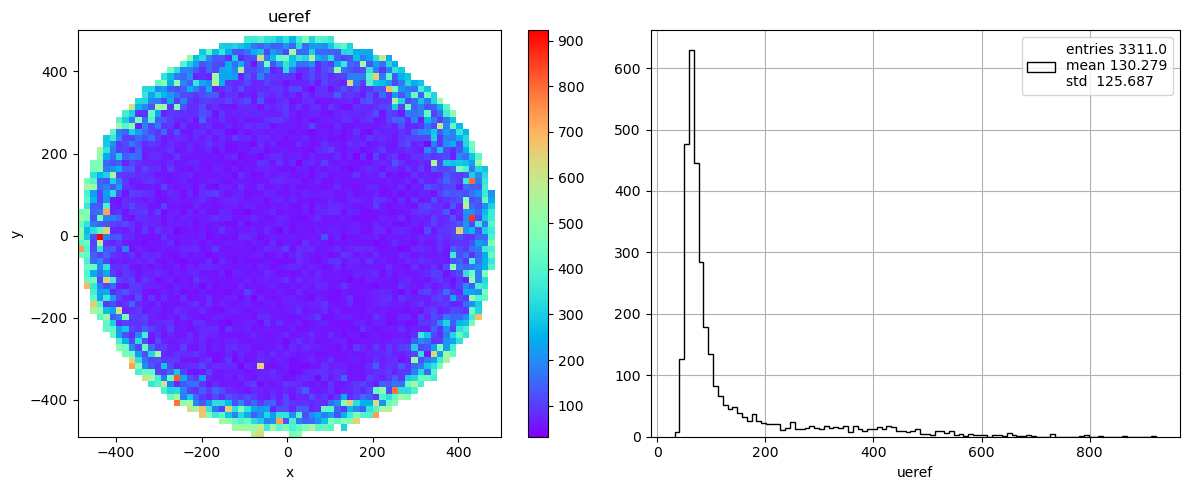

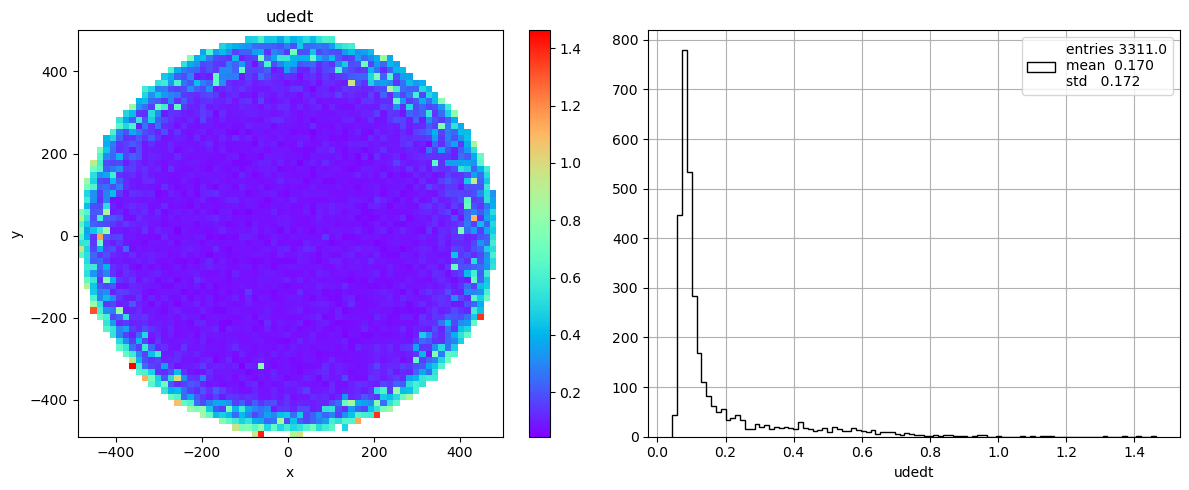

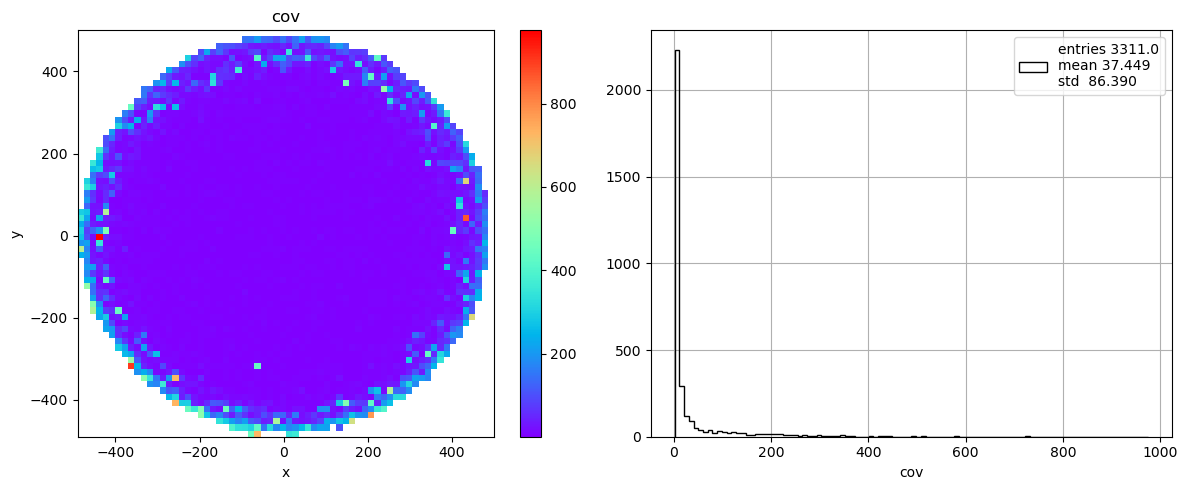

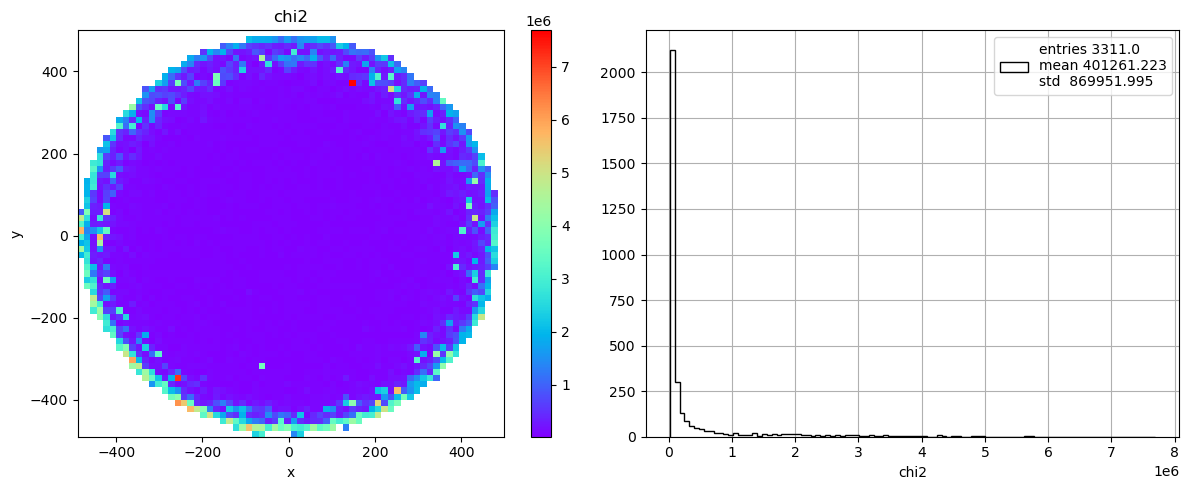

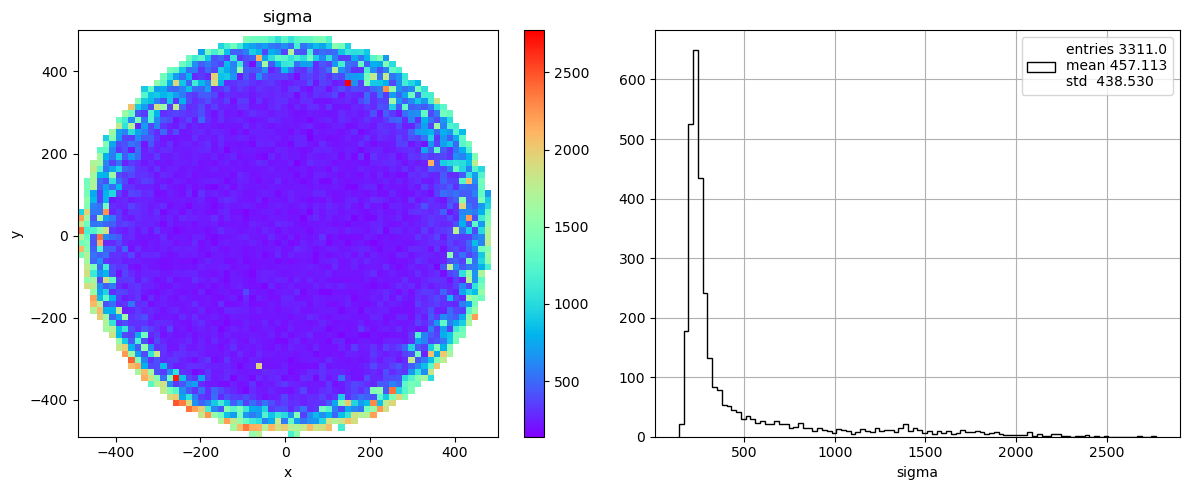

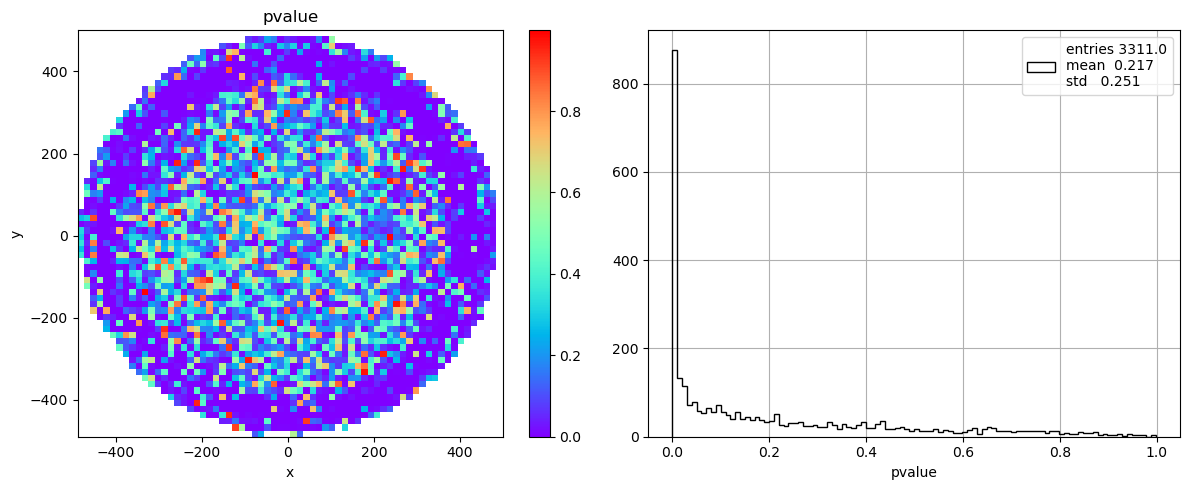

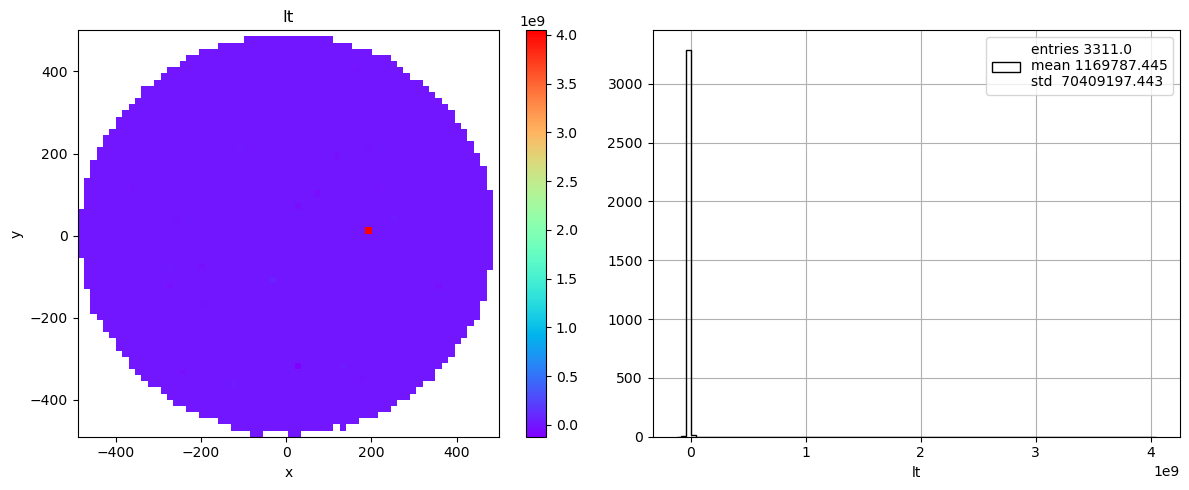

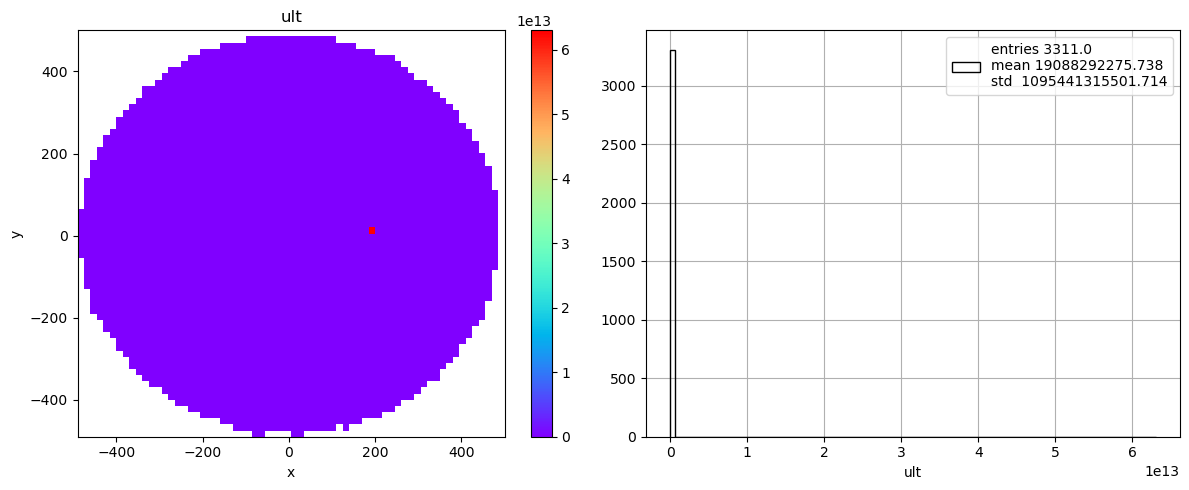

In [201]:
plot_krmap(fkrmap)

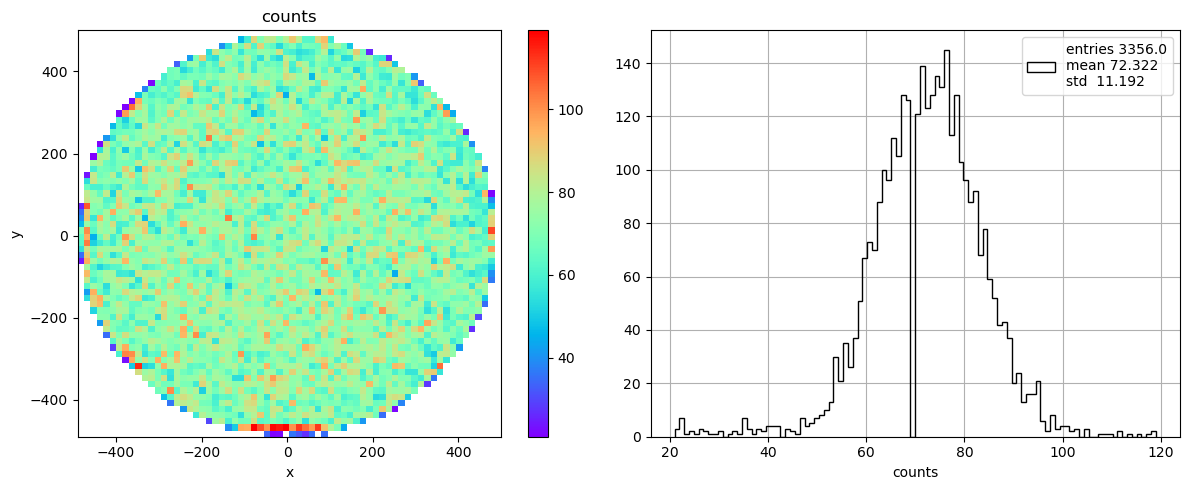

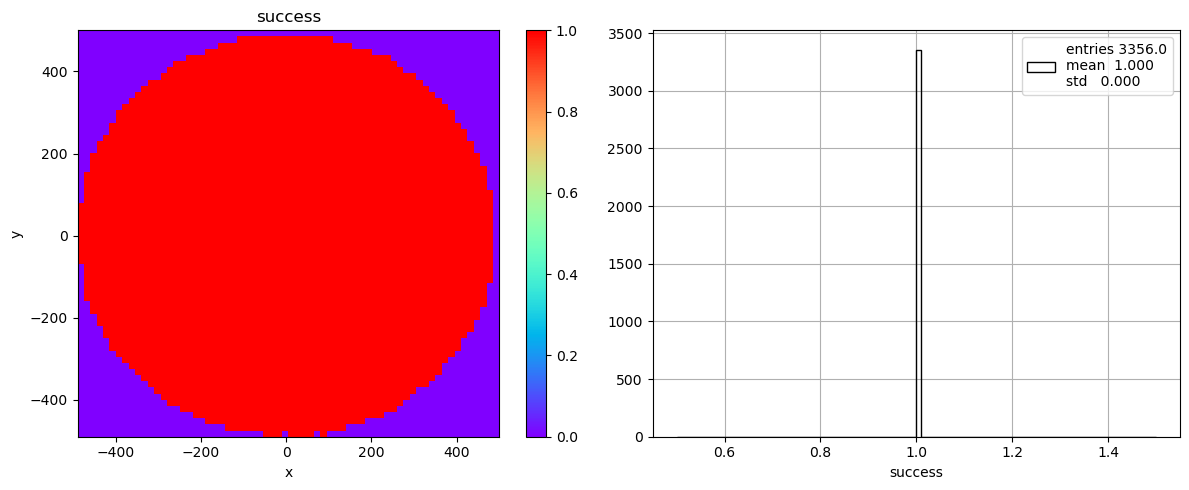

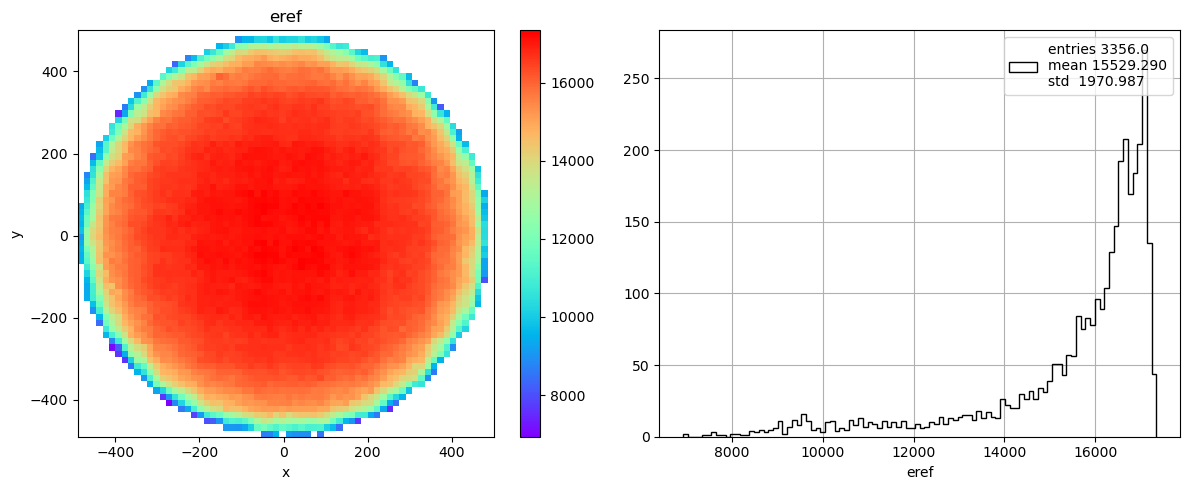

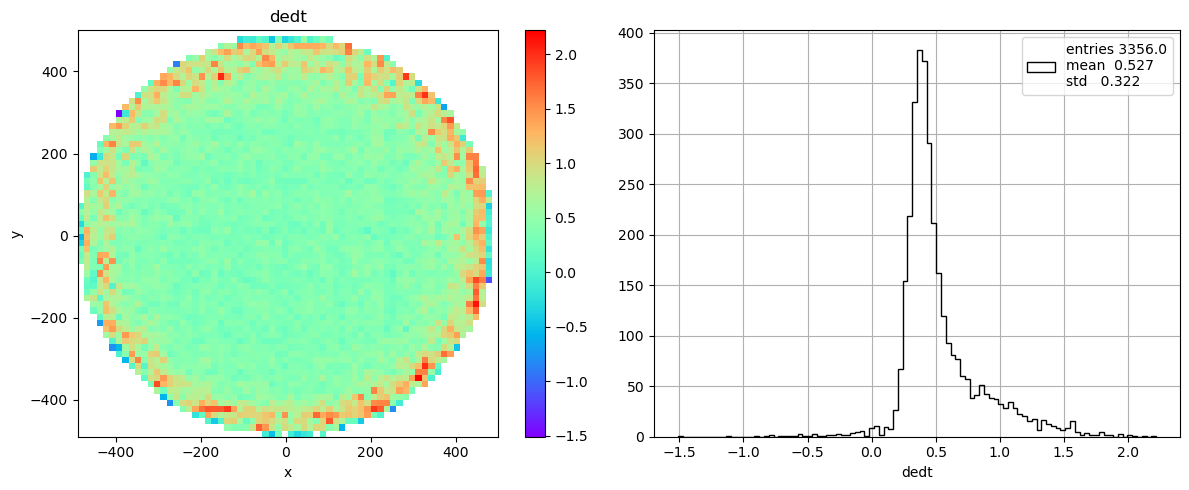

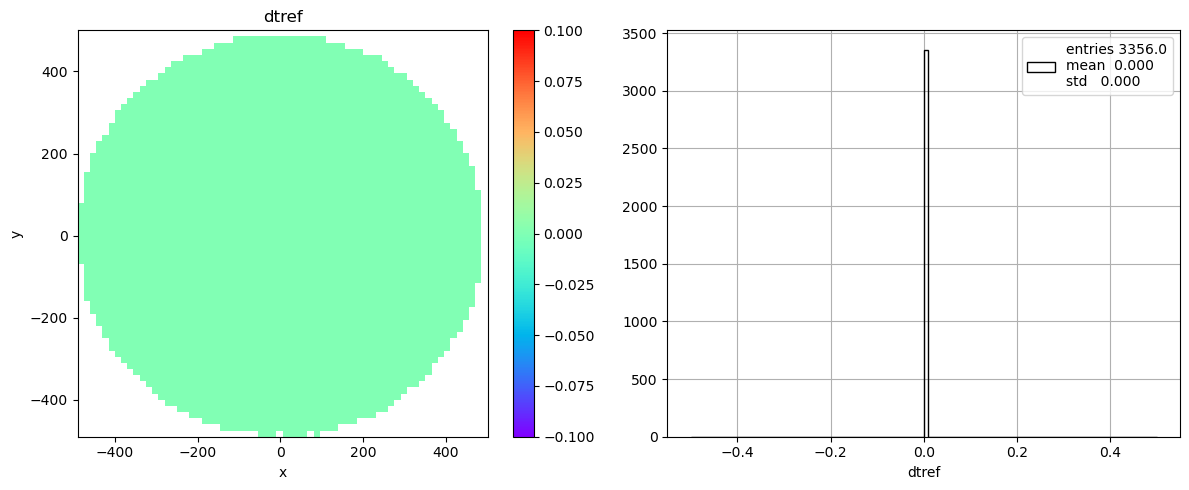

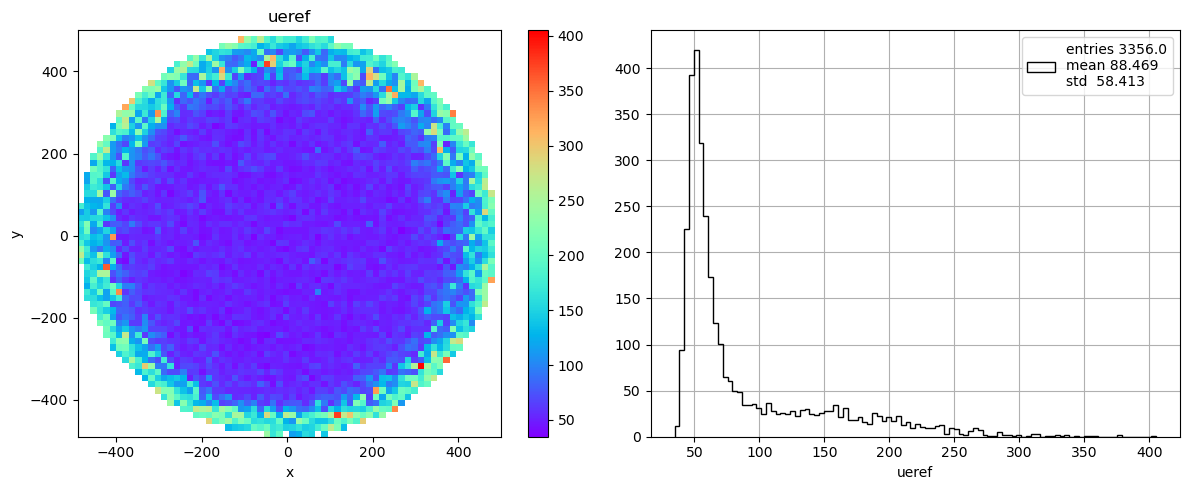

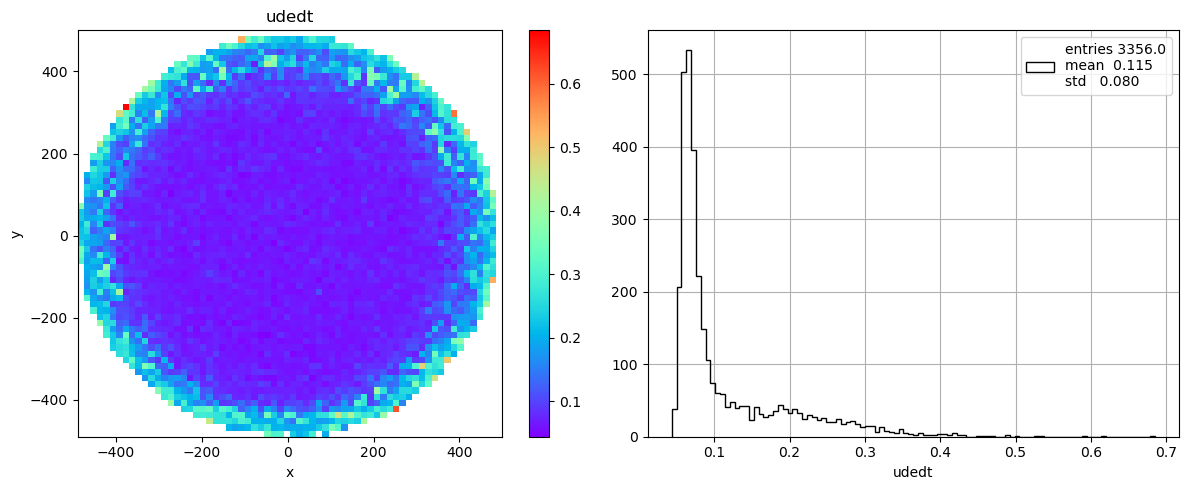

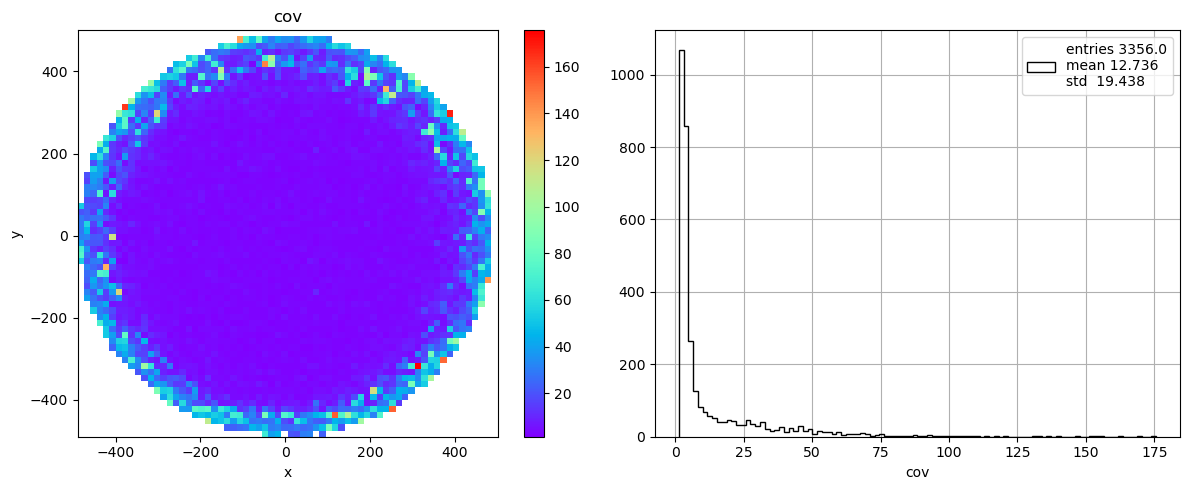

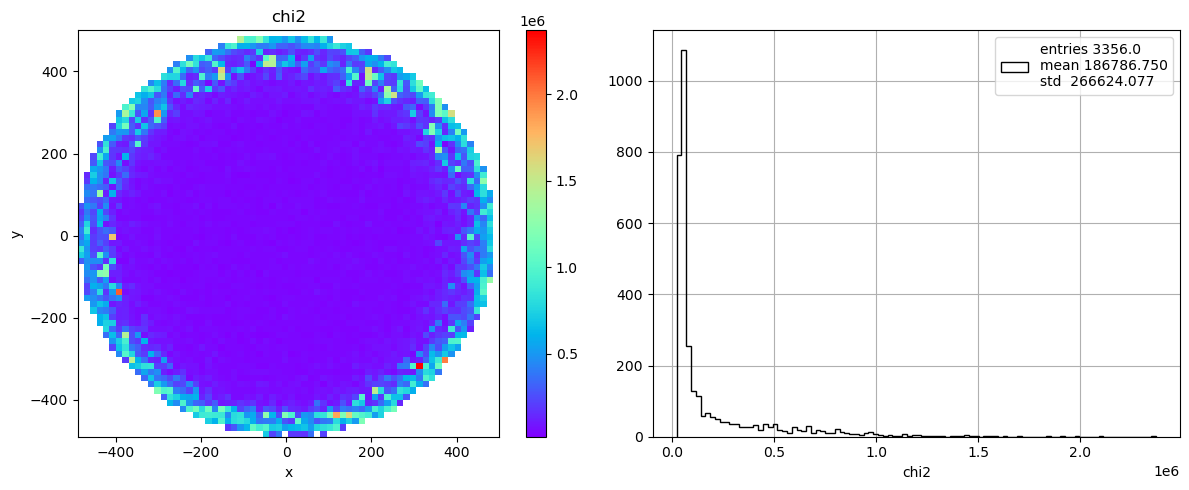

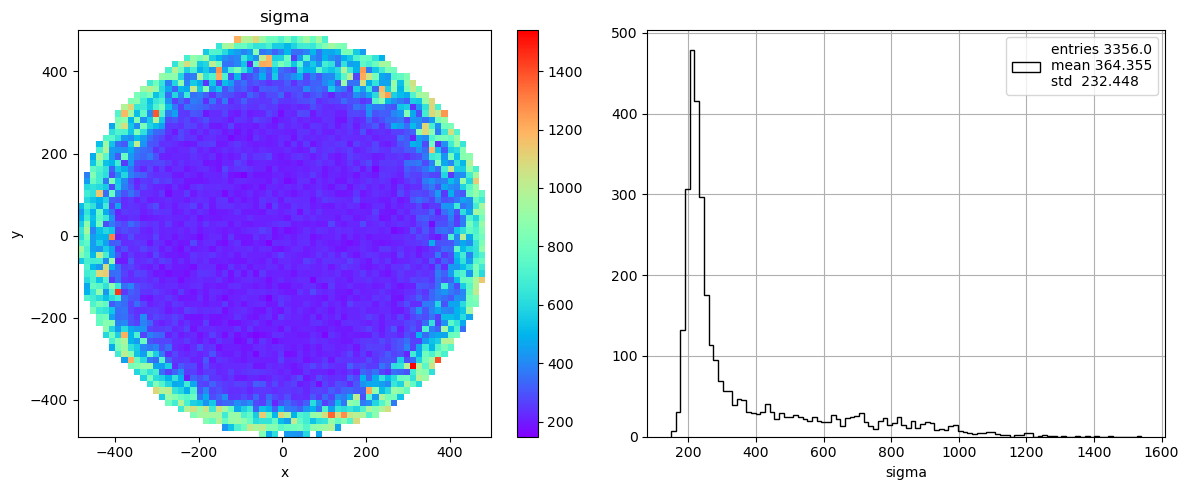

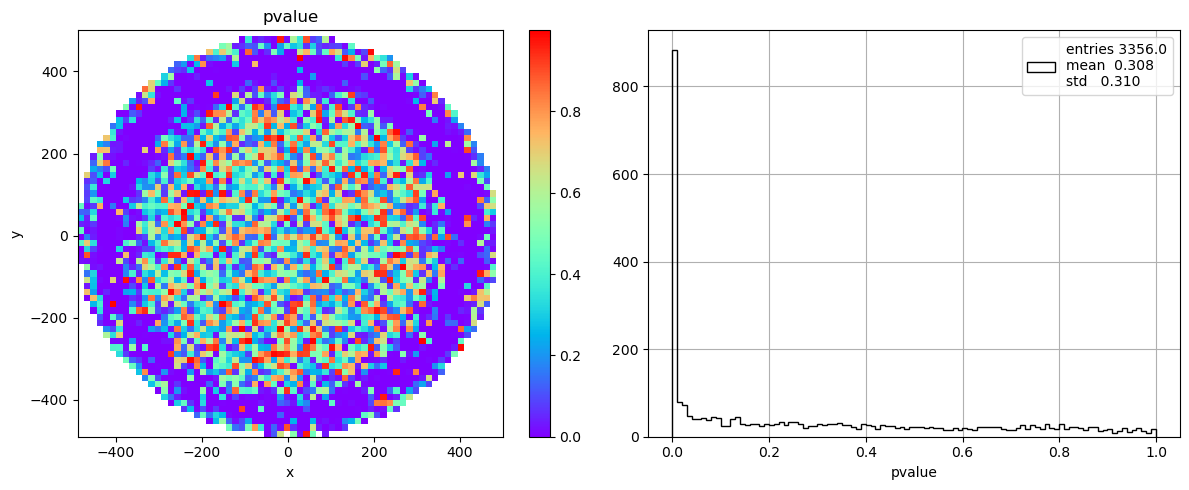

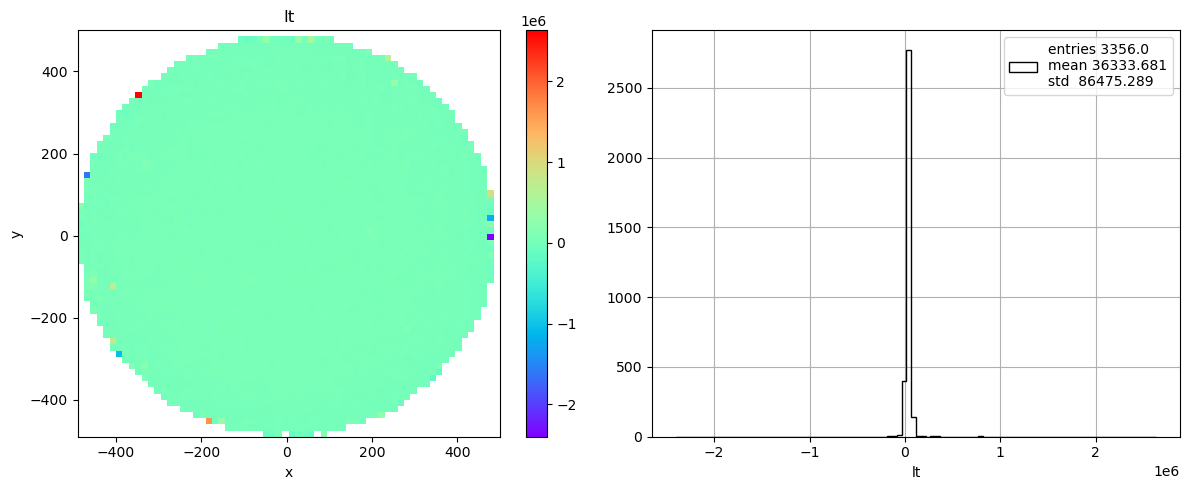

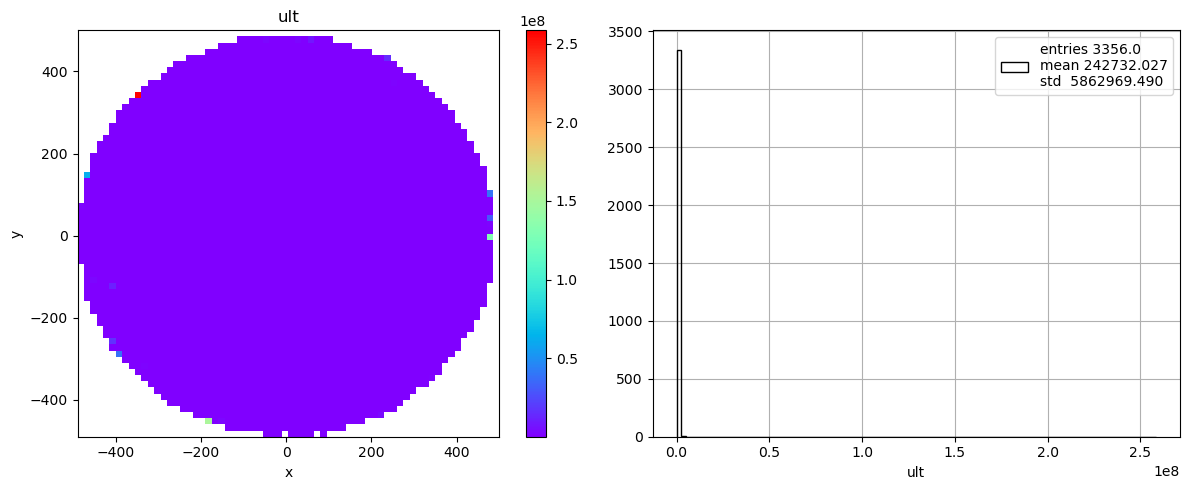

In [202]:
plot_krmap(dkrmap)

## Compare maps

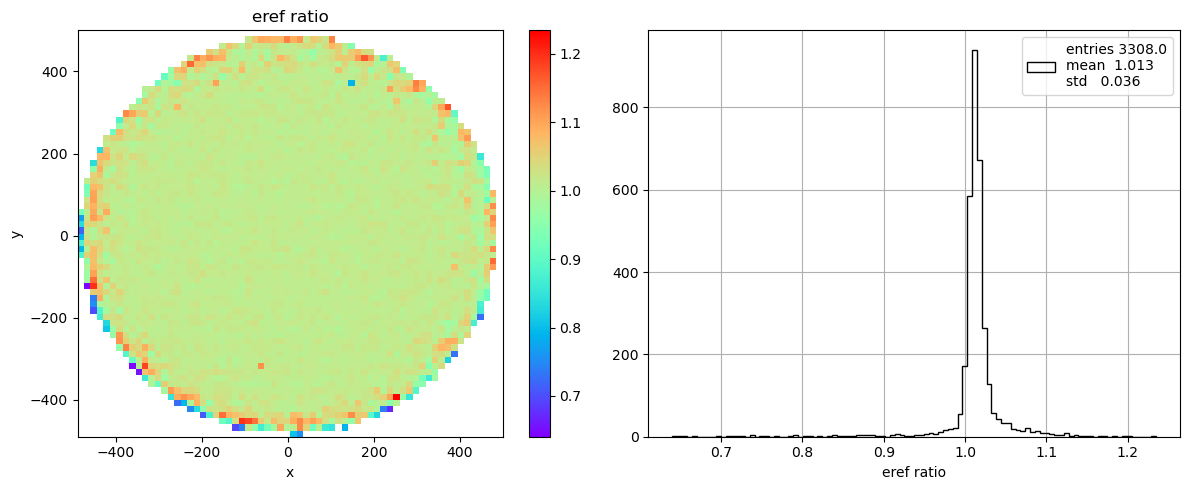

In [203]:
rat   = np.zeros(shape = fkrmap.eref.shape)
valid = (fkrmap.success) & (dkrmap.success)
rat[valid]  = fkrmap.eref[valid] / dkrmap.eref[valid]
#rat  = np.nan_to_num(rat, 0.)
#pltext.hist(rat.flatten(), 100);
krtool.plot_xyvar(rat , fkrmap.bin_edges, 'eref ratio'  , mask = valid);

## Correction

In [204]:
fcorr_ene = krtool.krmap_scale(fcoors, fdtime, fene, fkrmap, scale = 41.5)
dcorr_ene = krtool.krmap_scale(dcoors, ddtime, dene, dkrmap, scale = 41.5)

In [205]:
def hplot_ene(ene):
    xsel = ~np.isnan(ene)
    nbins, erange = 100, (38., 45)
    pltext.hist(ene[xsel], nbins, erange);
    cc = pltext.hfit(ene[xsel], nbins, range = erange, fun = 'gaus');
    pars = cc[3]
    resolution = 235.5 * pars[2]/pars[1]
    print(' Resolution {:6.2f} % FWHM'.format(resolution))

 Resolution   3.87 % FWHM
 Resolution   3.91 % FWHM


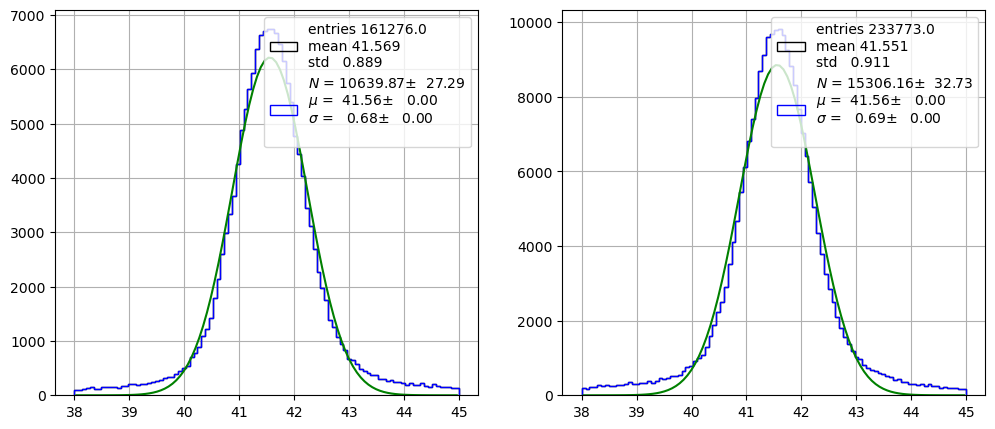

In [206]:
cd = pltext.canvas(2, 2)
cd(1), hplot_ene(fcorr_ene)
cd(2), hplot_ene(dcorr_ene);

## Check correction

In [209]:
def df_corrected(coors, dtime, cene):
    xsel = ~np.isnan(cene)
    df = {'x': coors[0][xsel], 'y' : coors[1][xsel], 'dtime': dtime[xsel], 'energy' : cene[xsel]}
    df = pd.DataFrame(df)
    krtool.plot_data(df, bins = 200)
    krtool.plot_xydt_energy_profiles(df, nbins = 500)
    return df
    
#plt.subplot(3, 2, 5)
#plt.ylim((25, 45));

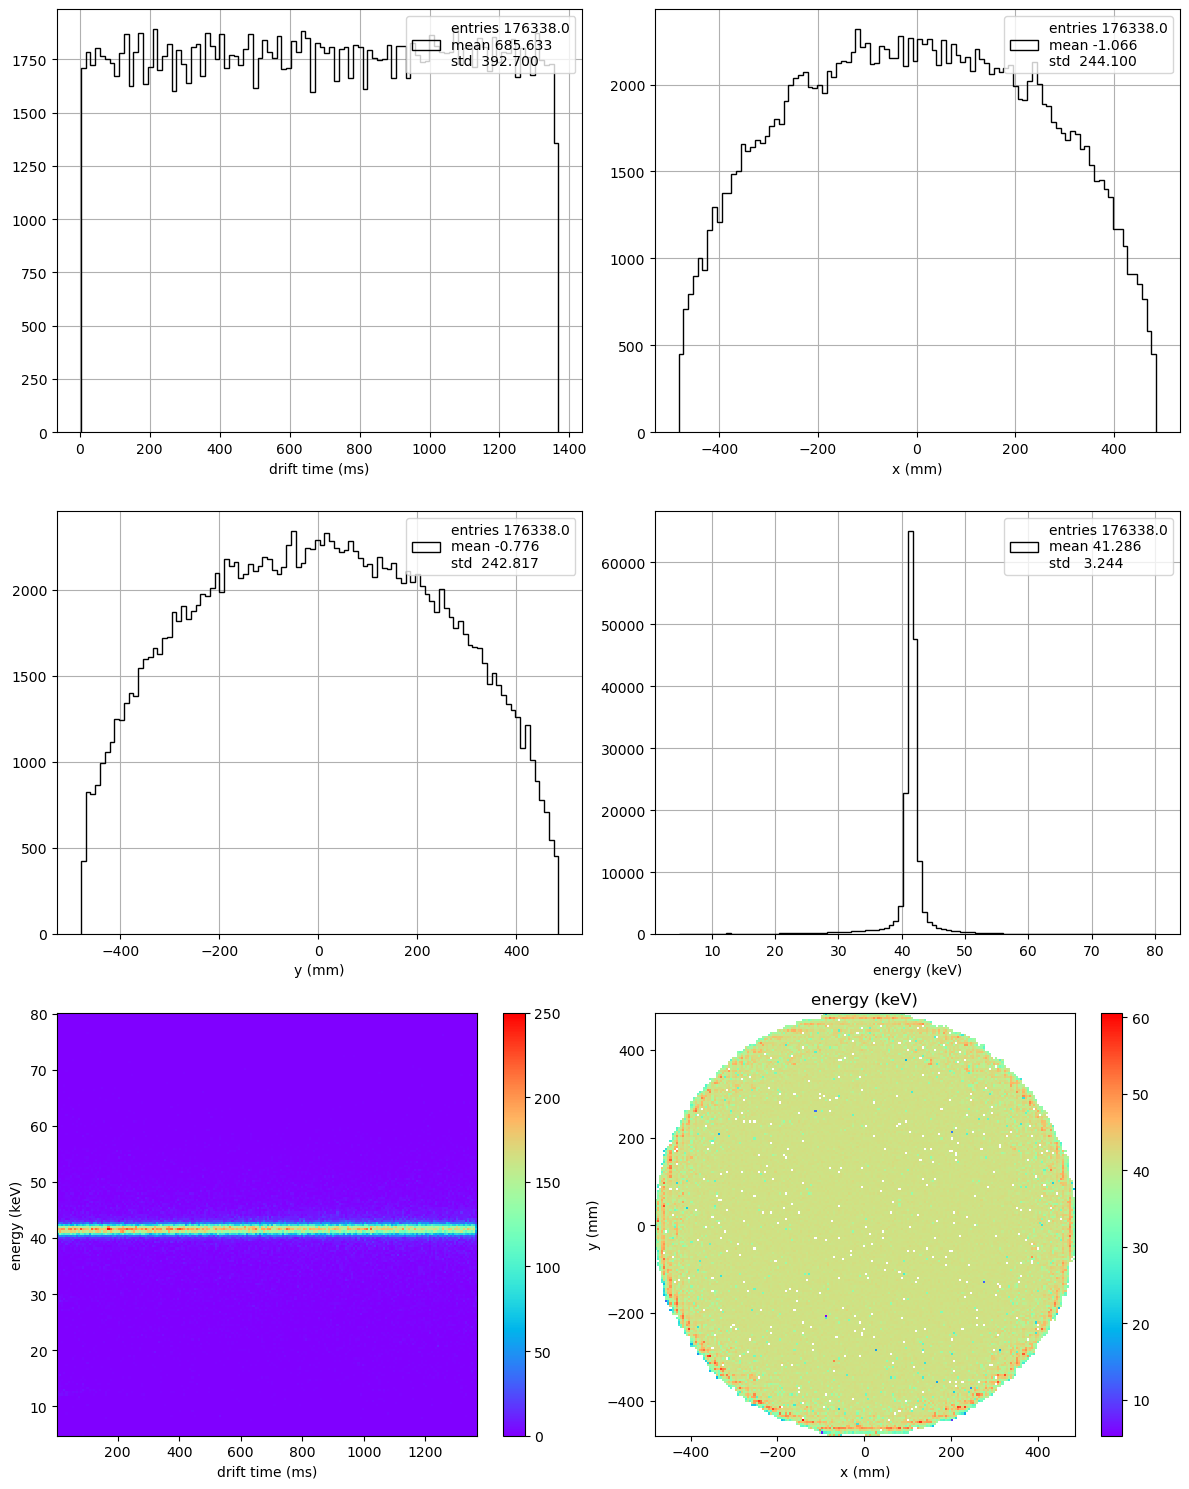

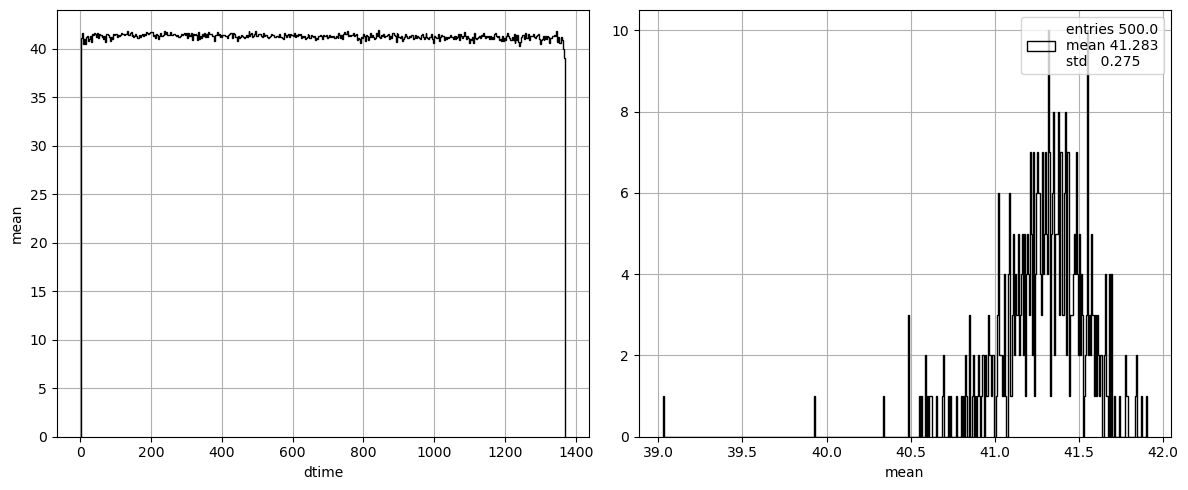

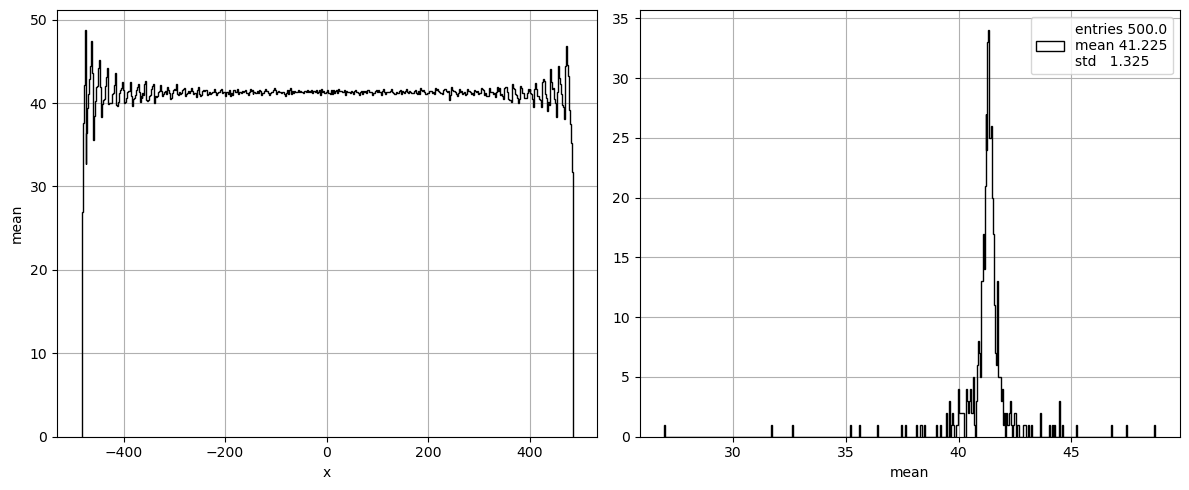

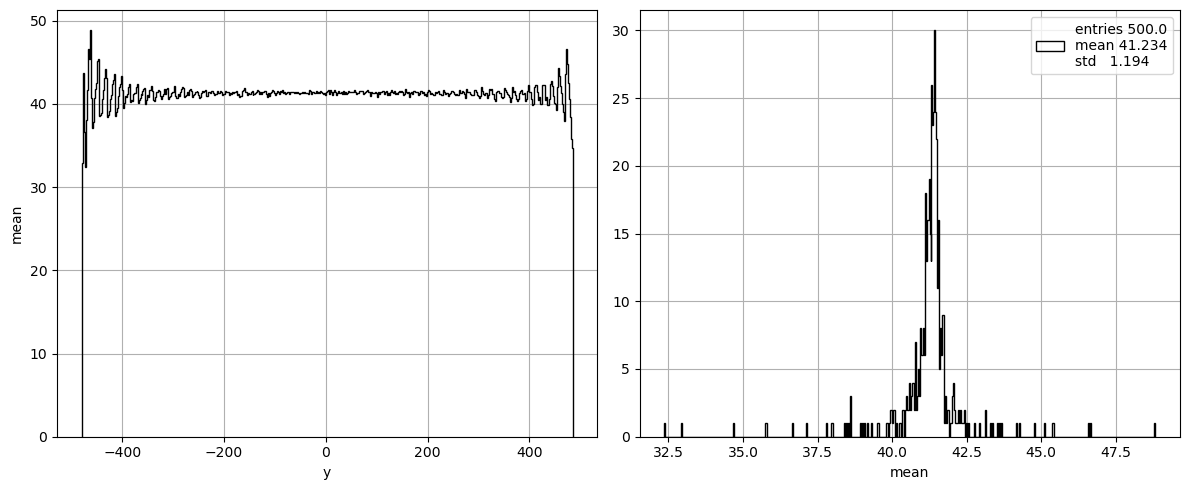

In [210]:
df_corrected(fcoors, fdtime, fcorr_ene);

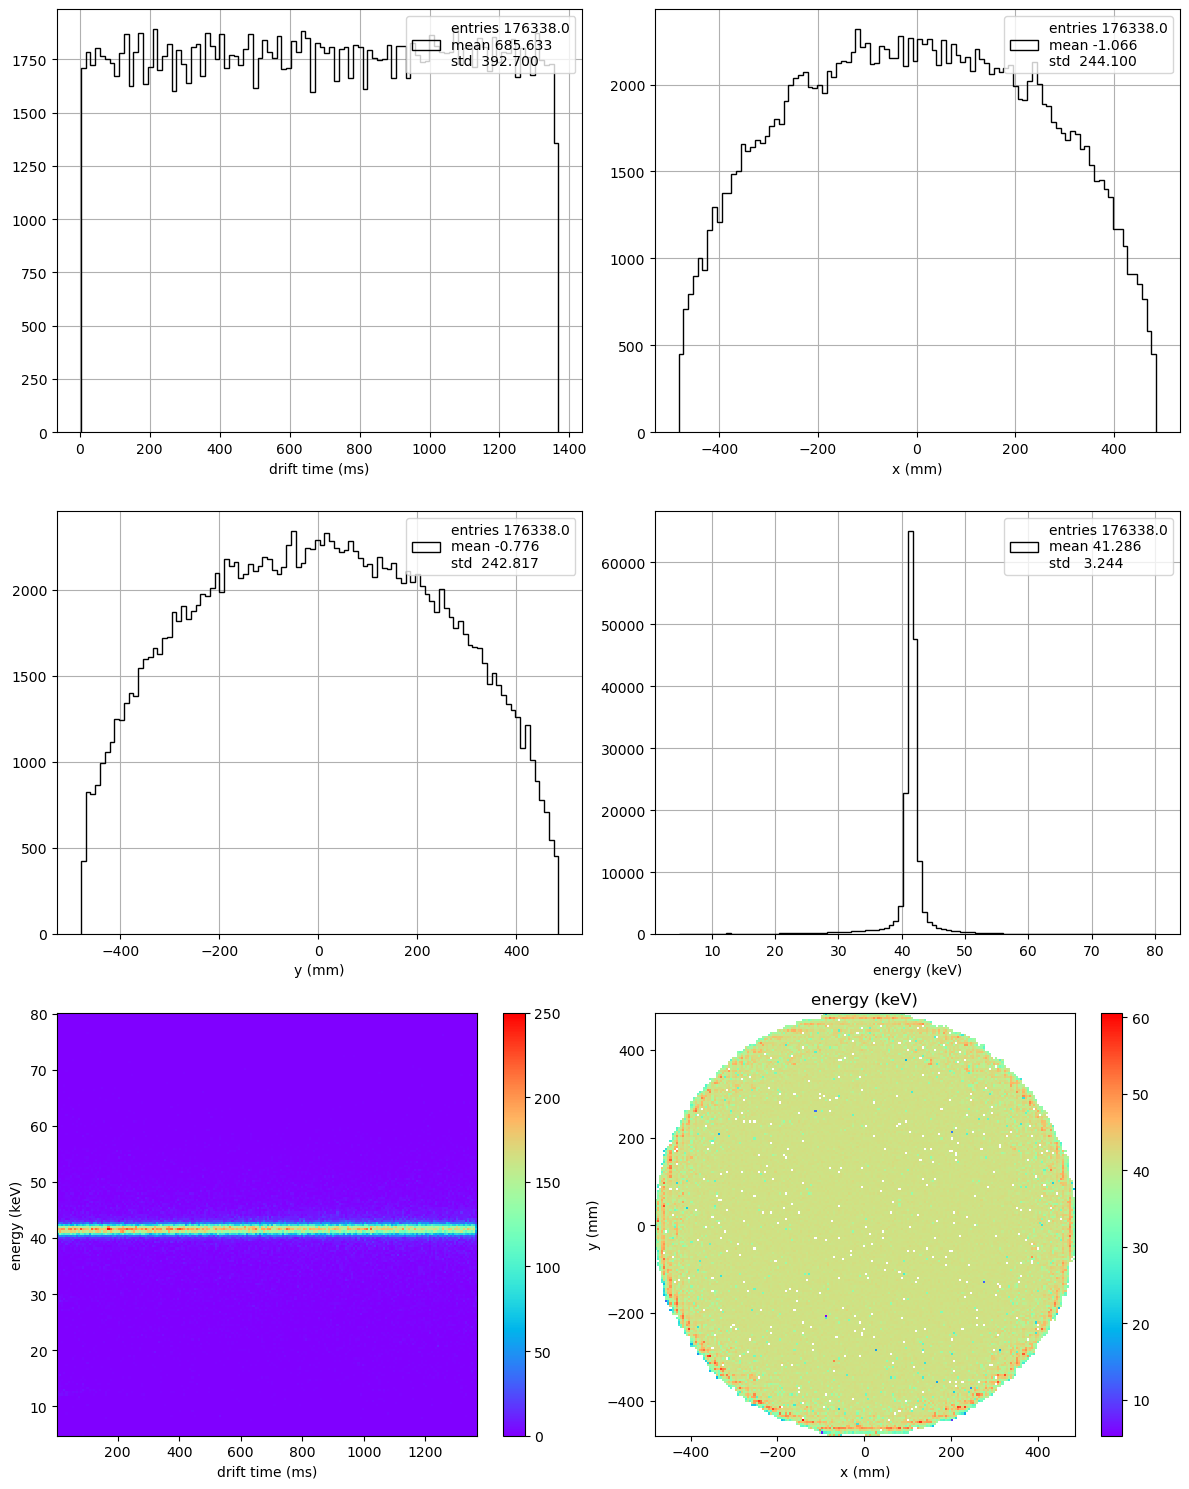

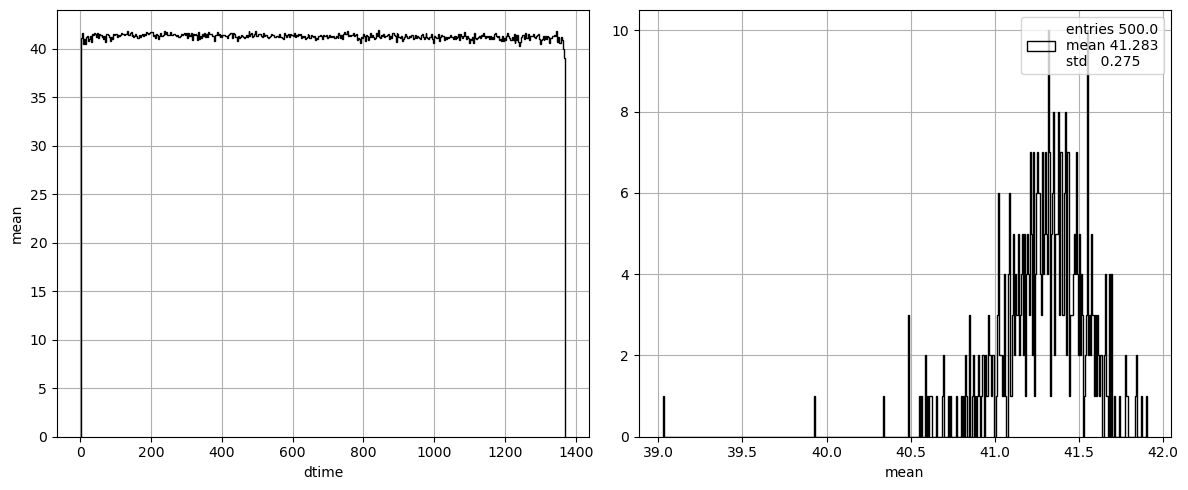

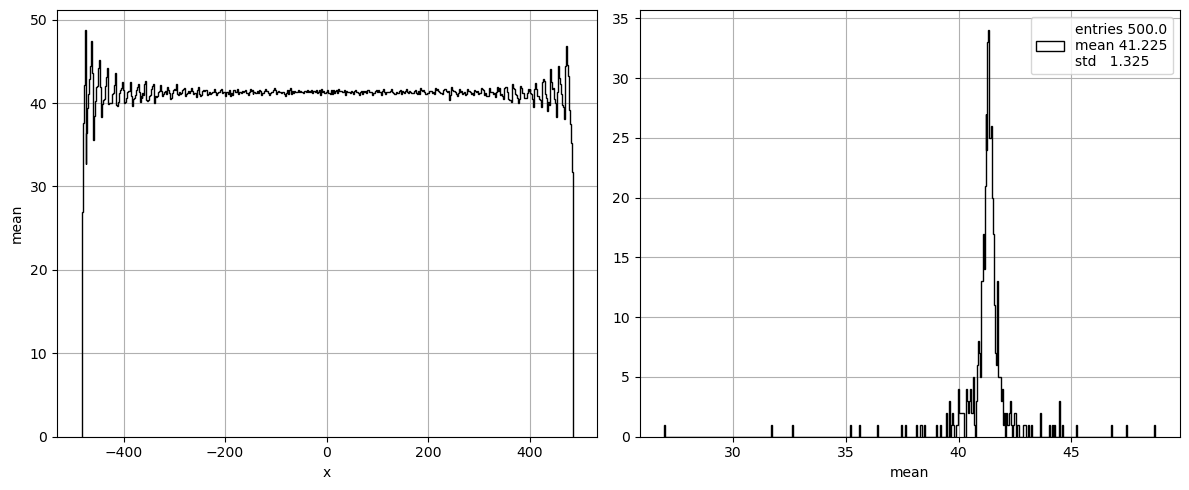

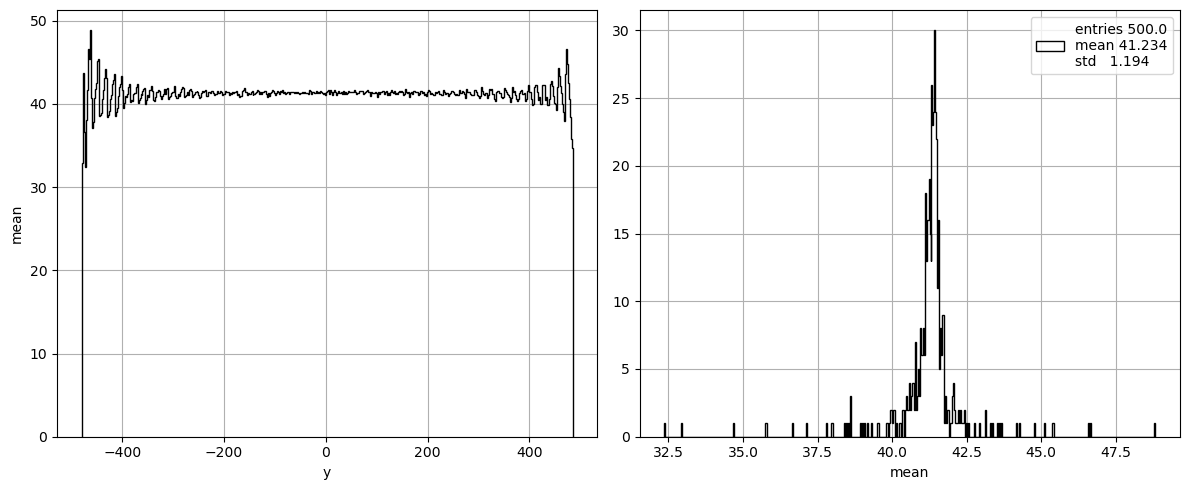

In [211]:
df_corrected(fcoors, fdtime, fcorr_ene);

## 

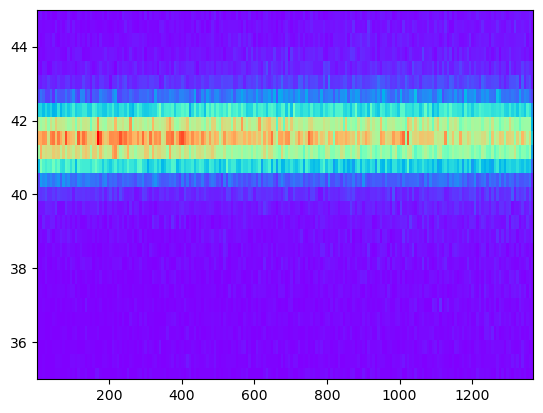

In [59]:
plt.hist2d(df.dtime, df.energy, 200);
plt.ylim((35, 45));

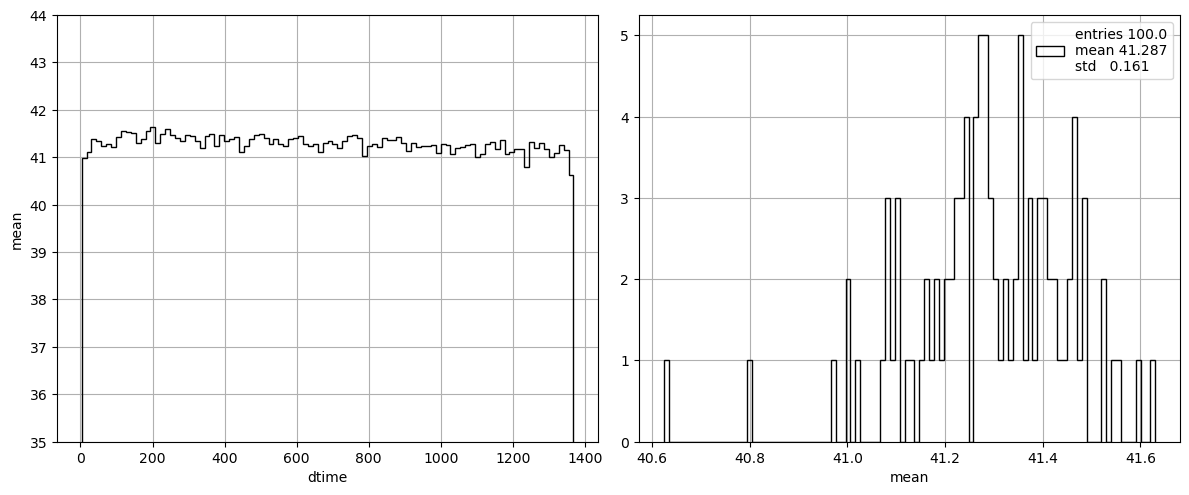

In [61]:
sel = df.dtime < 1500
zprof, _  = prof.profile((df.dtime[sel],), df.energy[sel], nbins)
prof.plot_profile(zprof, nbins = nbins, stats = ('mean',), coornames = ('dtime',))
plt.subplot(1, 2, 1);
plt.ylim((35, 44));

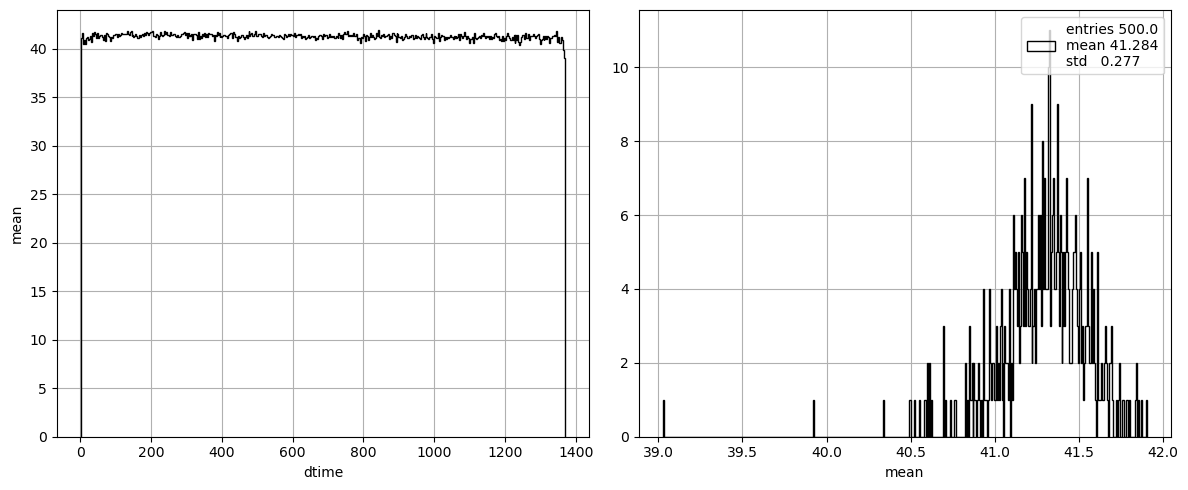

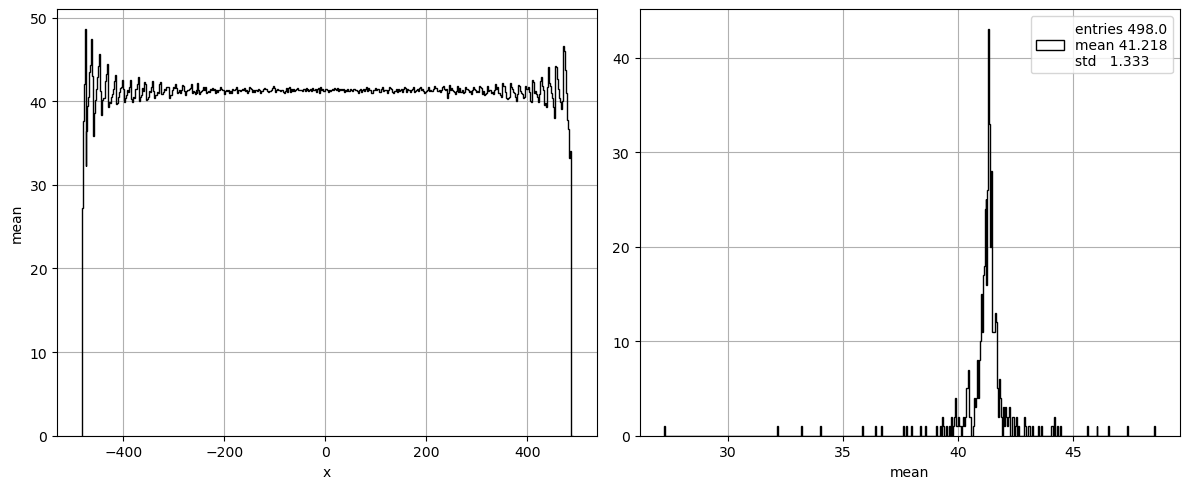

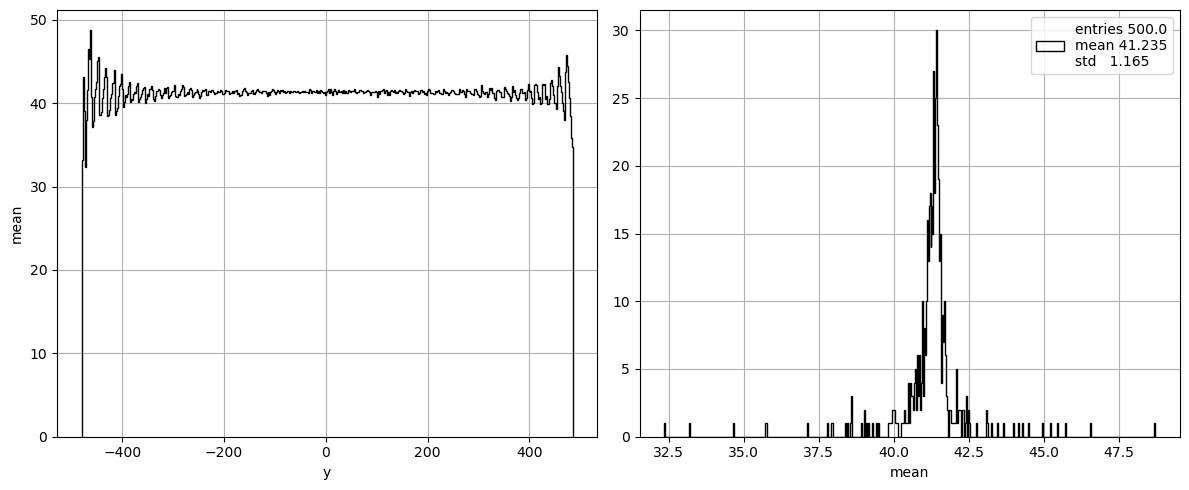

In [62]:
krtool.plot_xydt_energy_profiles(df, nbins = 500)


## Energy vs dtime

In [ ]:
def h2compare(sname, vars, range = (None, None), bins = (40, 40)):
    v1, v2 = vars[0], vars[1]
    cd = pltext.canvas(4, 2)
    i = 0
    for name in names:
        sel  = sels[name][sname]
        kdst = kdsts[name]
        var1, var2 = kdst[sel][v1], kdst[sel][v2]
        i+=1; cd(i); plt.scatter(var1, var2, alpha = 0.01)
        if (range[0] != None): plt.xlim(range[0]); plt.ylim(range[1])
        i+=1; cd(i); plt.hist2d(var1, var2, range = range, bins = bins)
        zprof, _  = prof.profile((var1,), var2, bins[0])
        plt.errorbar(zprof.bin_centers[0], zprof.mean, yerr = zprof.std/np.sqrt(zprof.counts), marker = '.')
        #prof.plot_profile(zprof, nbins = bins[0], stats = ('mean',), coornames = (name,))


bin_centers  40
mean  40
bin_centers  40
mean  40


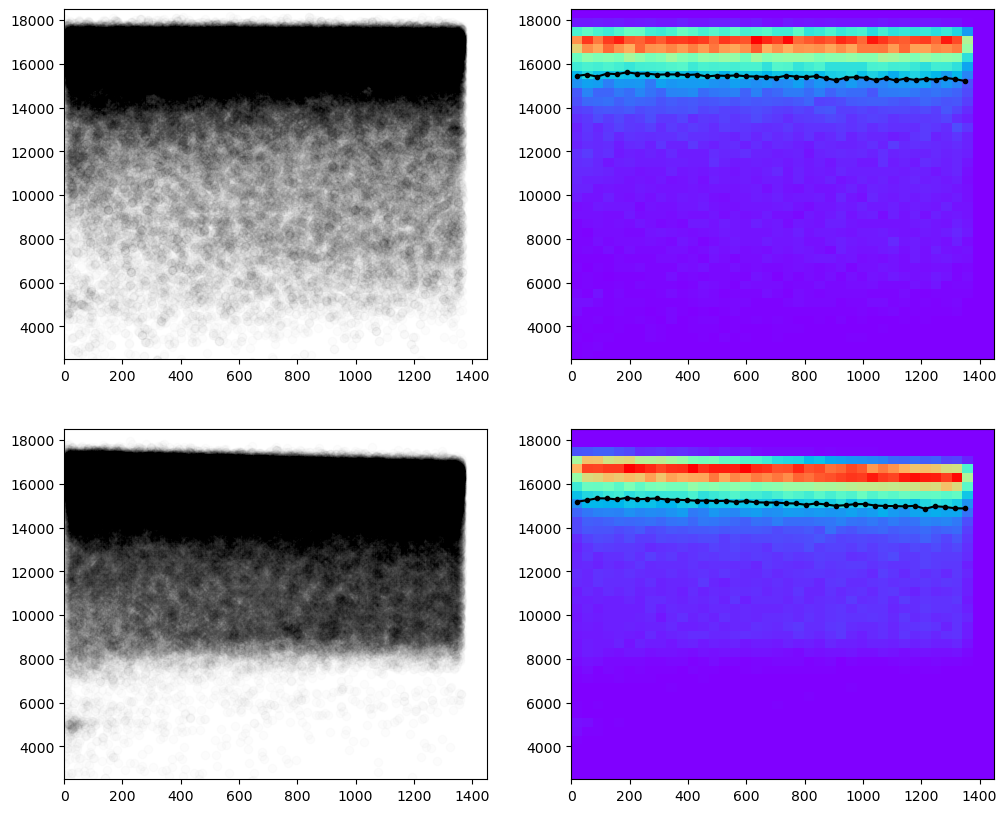

In [300]:
h2compare('fidutial', ('dtime', 'energy'), range = ((0, 1450), (2500, 18500)));

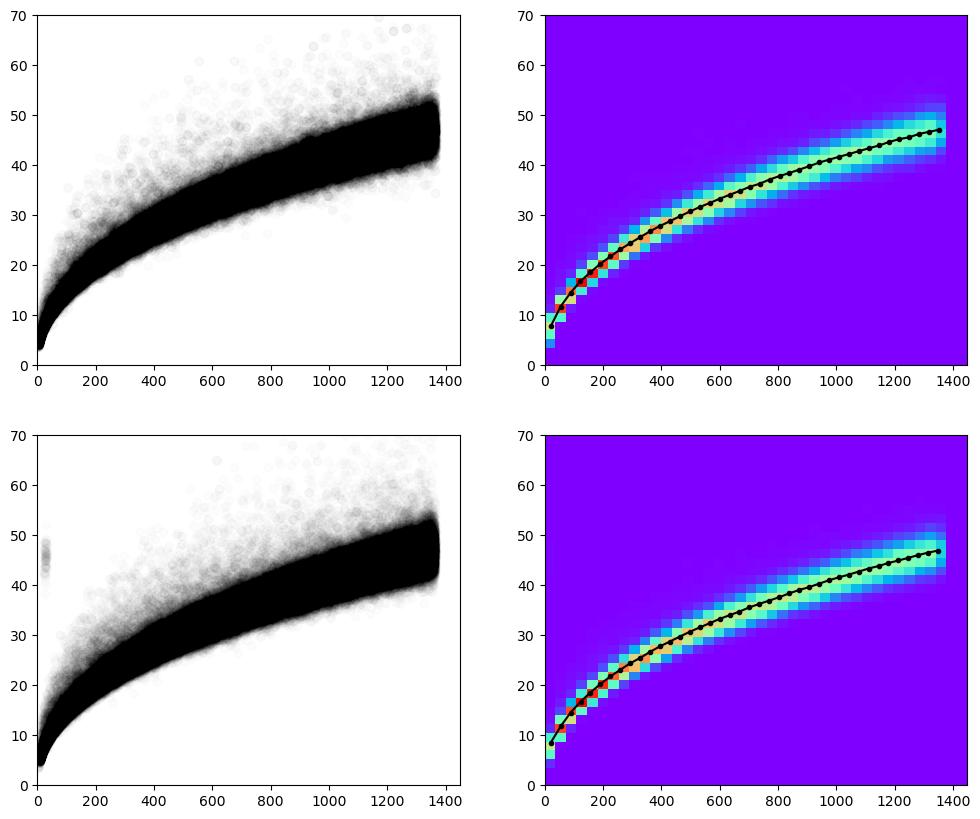

In [302]:
h2compare('fidutial', ('dtime', 'S2w'), range = ((0, 1450), (0, 70)));

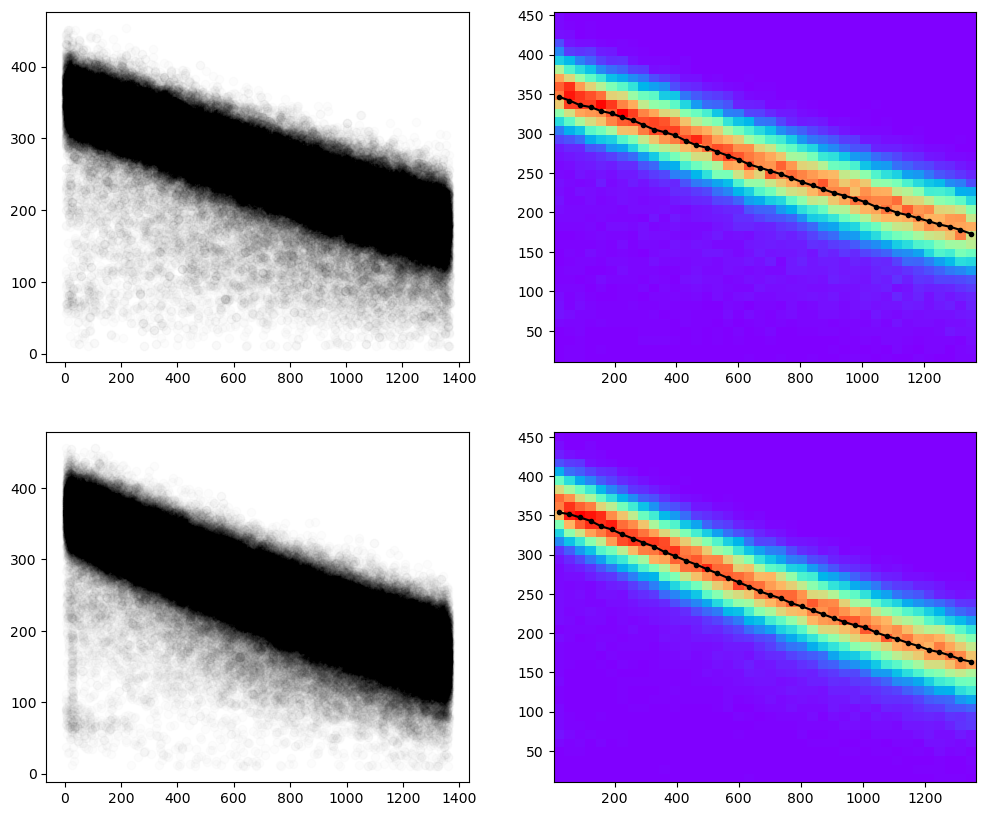

In [303]:
h2compare('fidutial', ('dtime', 'S2q'))

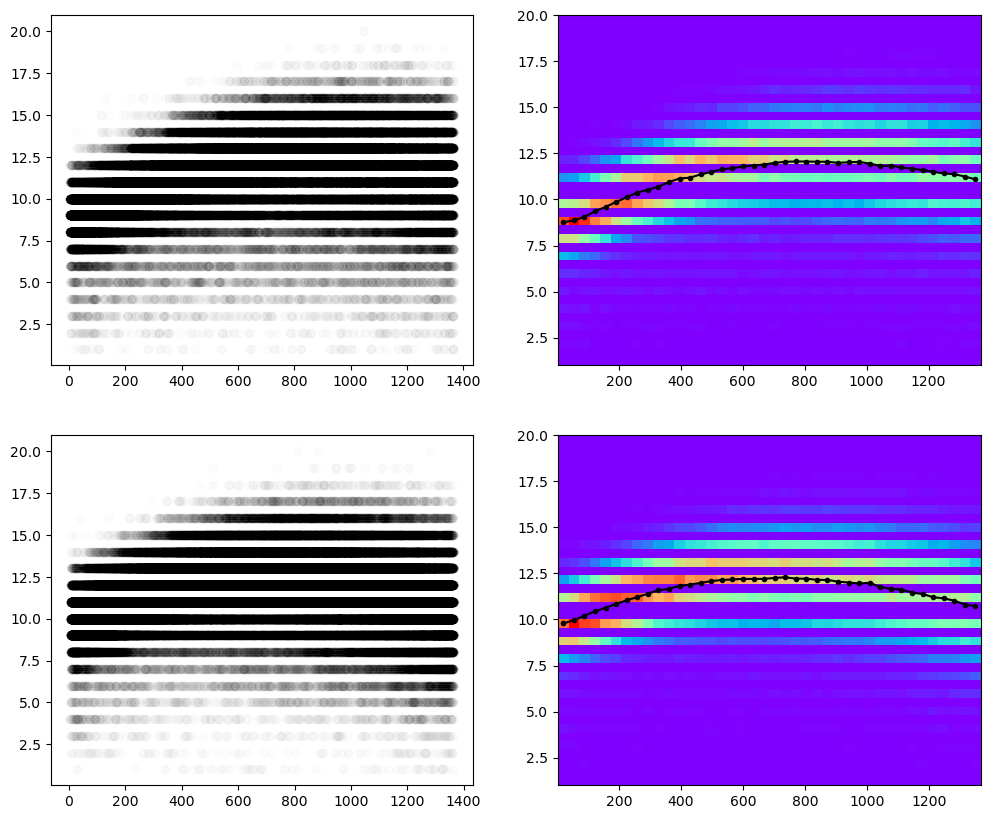

In [304]:
h2compare('fidutial', ('dtime', 'Nsipm'))

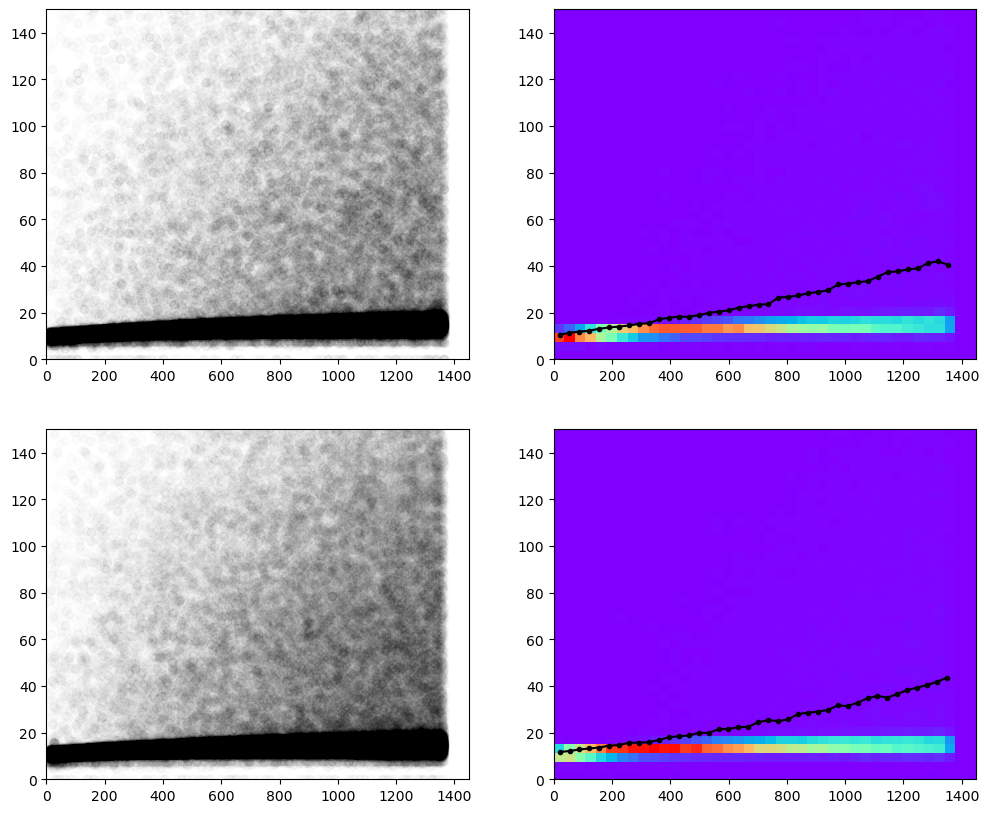

In [305]:
h2compare('fidutial', ('dtime', 'Xrms'), range = ((0, 1450), (0, 150)));